In [79]:
import pandas as pd

df = pd.read_csv(
    "../data/cleaned_data/cleaned_data_2.csv"
)

In [80]:
df.head()

,Unnamed: 0,P_Num,Gender,Age,Ethnicity,Education,OCD_selfReport,TreatmentPresence,OCIR_Total,HADS_DEP_Scale_Total,...,OCIR_Hoarding_Total,OCIR_Checking_Total,OCIR_Ordering_Total,OCIR_Neutralizing_Total,OCIR_Washing_Total,OCIR_Obsessing_Total,COPE_Inventory_Active_Coping_Total,COPE_Inventory_Planning_Total,COPE_Inventory_Total,Brief_Experiential_Avoidance_Questionnaire_Total
0,0,2,1,23.0,4,1,1,1,26.0,2.0,...,0.0,8.0,6.0,4.0,3.0,5.0,15.0,16.0,31.0,31.0
1,1,3,1,22.0,4,1,1,1,15.0,2.0,...,1.0,2.0,5.0,1.0,1.0,5.0,14.0,16.0,30.0,45.0
2,2,4,1,21.0,4,1,1,1,20.0,13.0,...,0.0,3.0,2.0,0.0,6.0,9.0,9.0,6.0,15.0,83.0
3,3,5,1,18.0,4,1,1,1,45.0,11.0,...,2.0,9.0,4.0,11.0,12.0,7.0,10.0,12.0,22.0,77.0
4,4,6,1,19.0,4,2,1,1,22.0,15.0,...,4.0,1.0,3.0,0.0,12.0,2.0,8.0,6.0,14.0,87.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 27 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        149 non-null    int64  
 1   P_Num                                             149 non-null    int64  
 2   Gender                                            149 non-null    int64  
 3   Age                                               149 non-null    float64
 4   Ethnicity                                         149 non-null    int64  
 5   Education                                         149 non-null    int64  
 6   OCD_selfReport                                    149 non-null    int64  
 7   TreatmentPresence                                 149 non-null    int64  
 8   OCIR_Total                                        149 non-null    float64
 9   HADS_DEP_Scale_Total 

In [82]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [83]:
df.duplicated().sum()

np.int64(0)

filtering the data frame so it only contains present OCD patients, as this is the recommended threshold for the OCIR scale

In [84]:
df=df[(df["OCIR_Total"] >=21)].copy()

In [85]:
df["HADS_ANX_Scale_Total"]

0       8.0
3      18.0
4      17.0
5      14.0
6      12.0
       ... 
144    17.0
145    14.0
146    13.0
147     6.0
148    15.0
Name: HADS_ANX_Scale_Total, Length: 122, dtype: float64

In [86]:
df["HADS_ANX_Scale_Total"].min()

np.float64(1.0)

In [87]:
df["HADS_DEP_Scale_Total"]

0       2.0
3      11.0
4      15.0
5       8.0
6       4.0
       ... 
144     7.0
145    15.0
146    14.0
147     1.0
148    15.0
Name: HADS_DEP_Scale_Total, Length: 122, dtype: float64

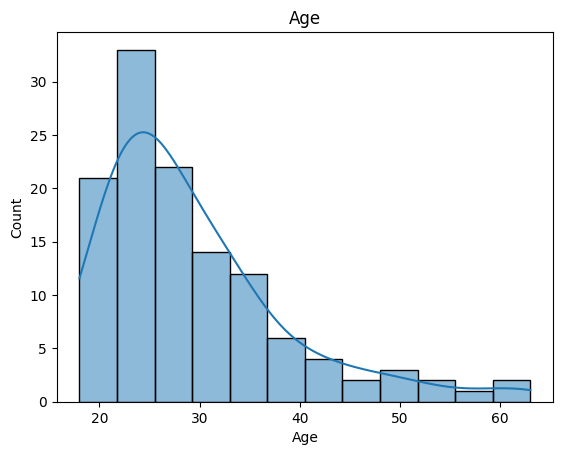

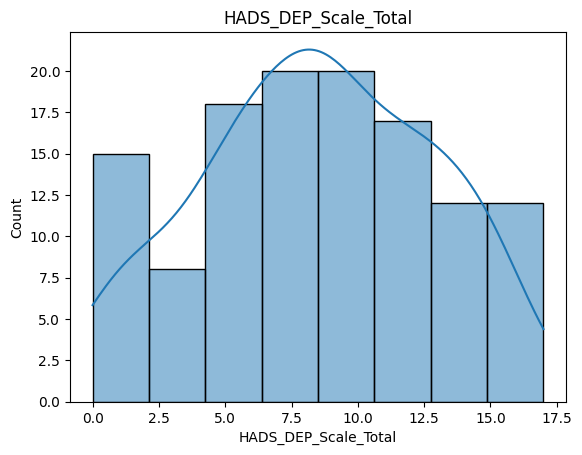

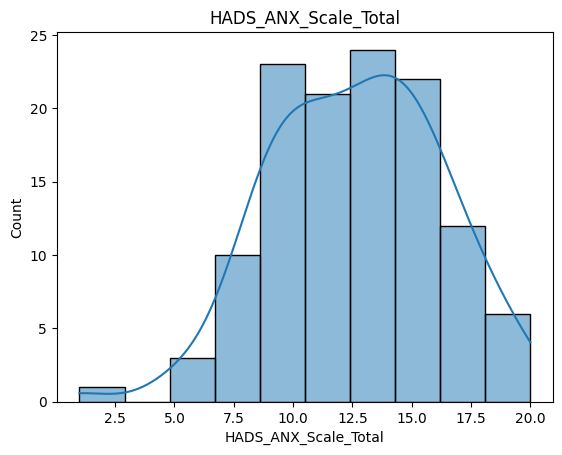

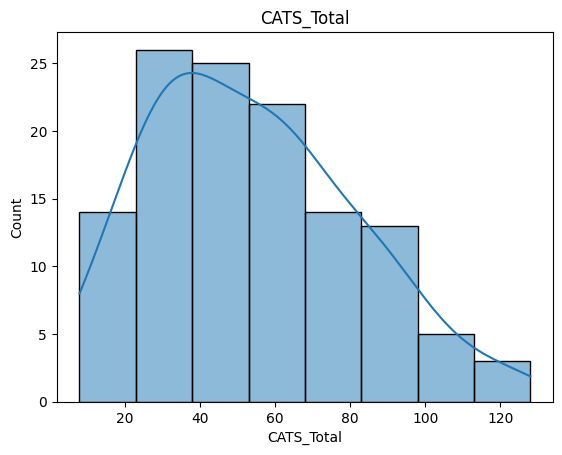

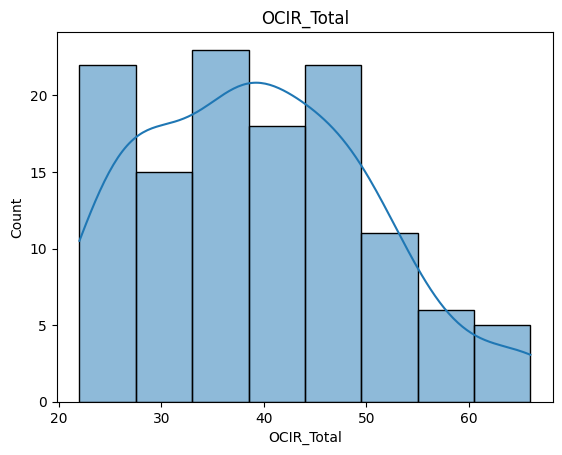

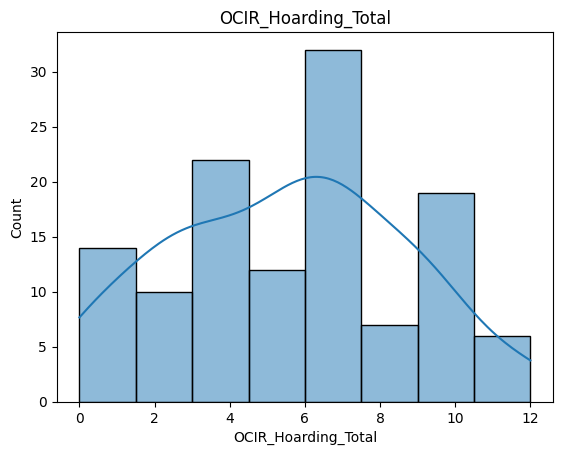

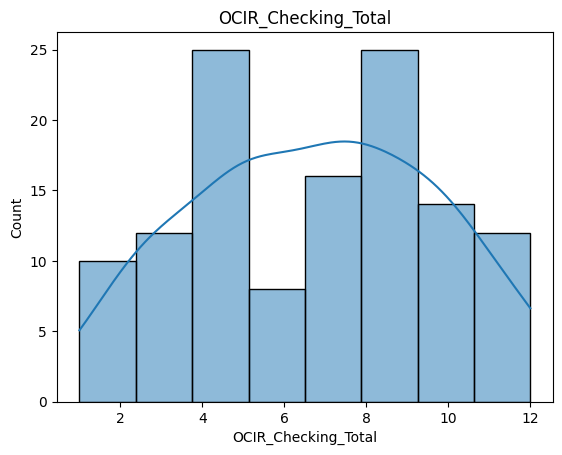

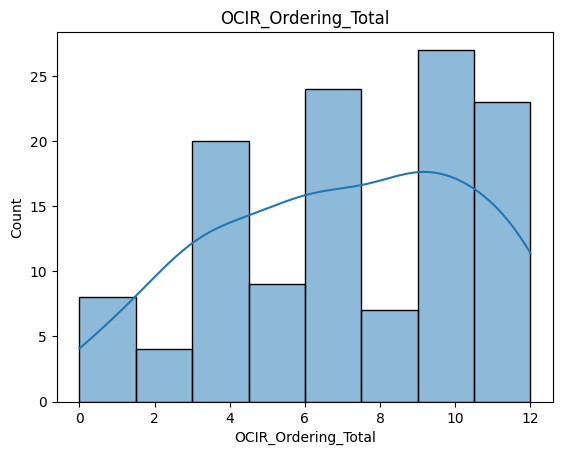

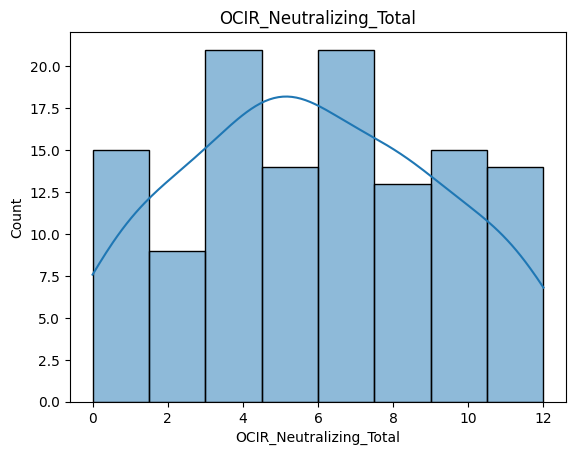

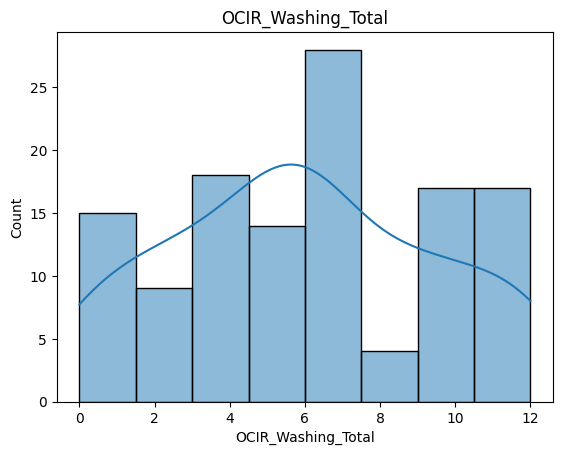

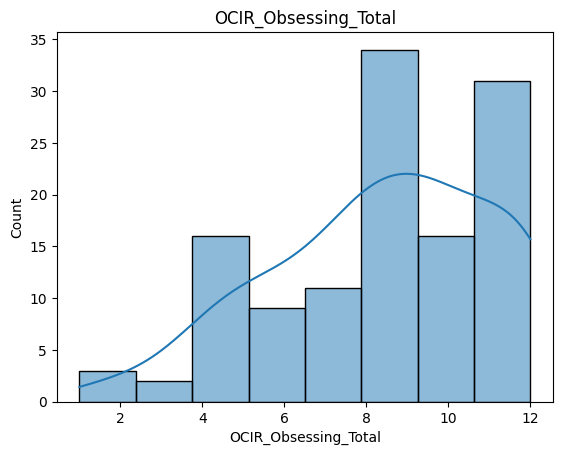

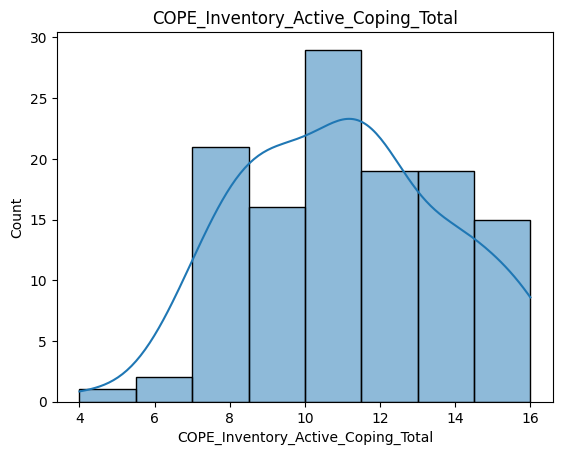

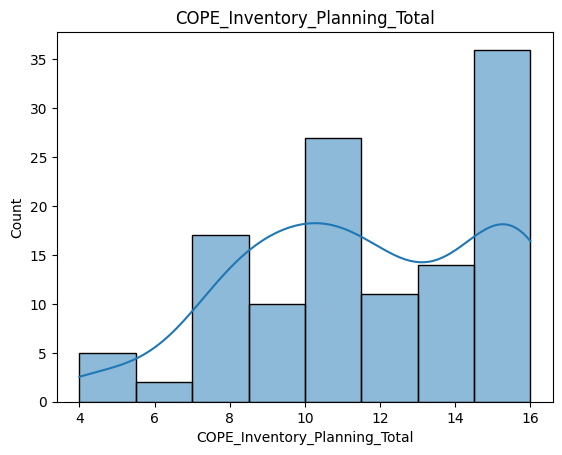

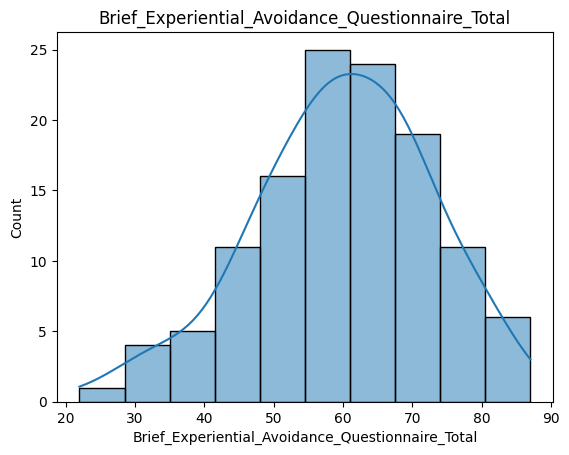

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [
    "Age",
    "HADS_DEP_Scale_Total",
    "HADS_ANX_Scale_Total",
    "CATS_Total",
    "OCIR_Total",
    "OCIR_Hoarding_Total",
    "OCIR_Checking_Total",
    "OCIR_Ordering_Total",
    "OCIR_Neutralizing_Total",
    "OCIR_Washing_Total",
    "OCIR_Obsessing_Total",
    "COPE_Inventory_Active_Coping_Total",
    "COPE_Inventory_Planning_Total",
    "Brief_Experiential_Avoidance_Questionnaire_Total",
]

for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

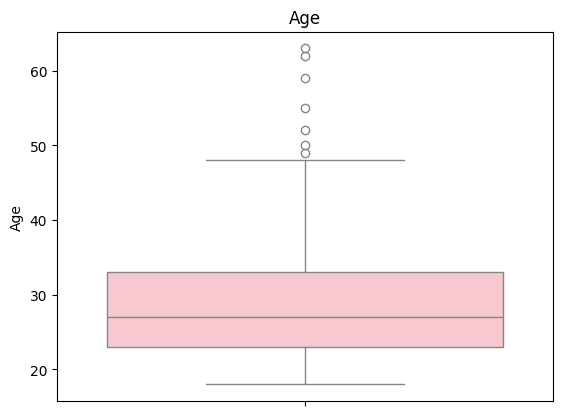

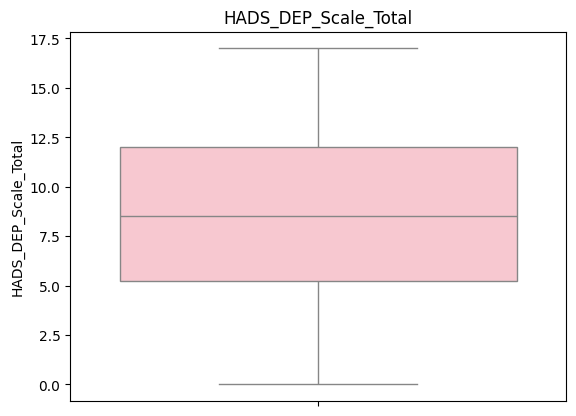

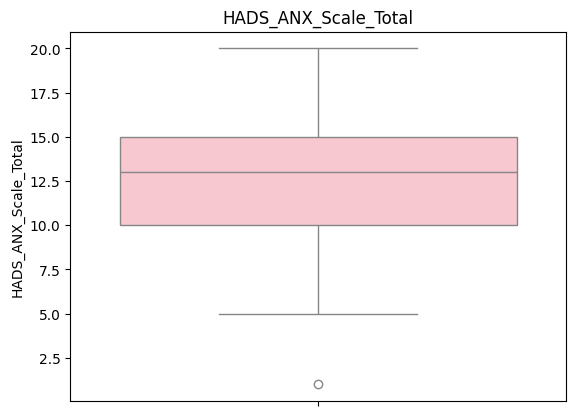

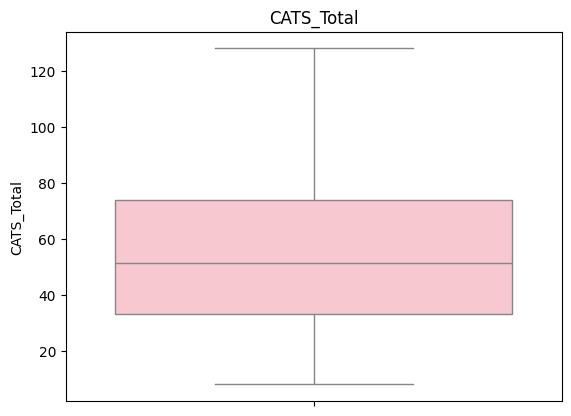

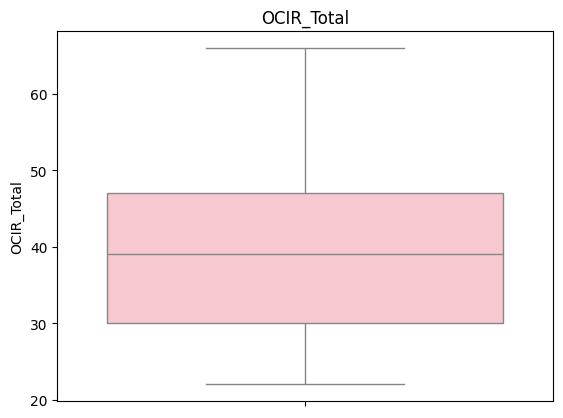

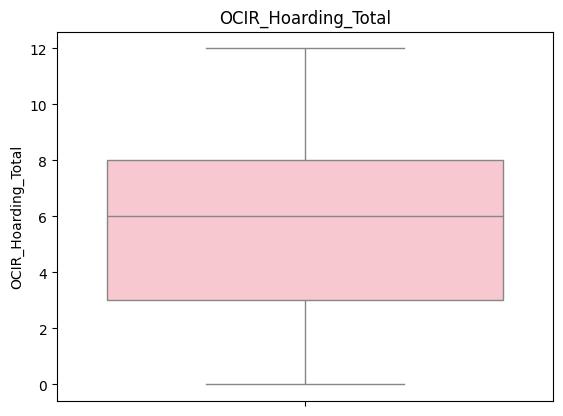

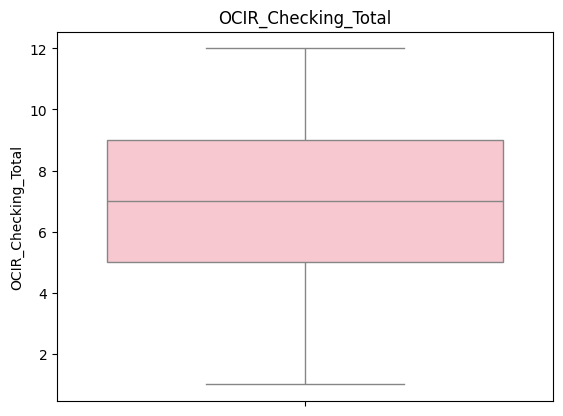

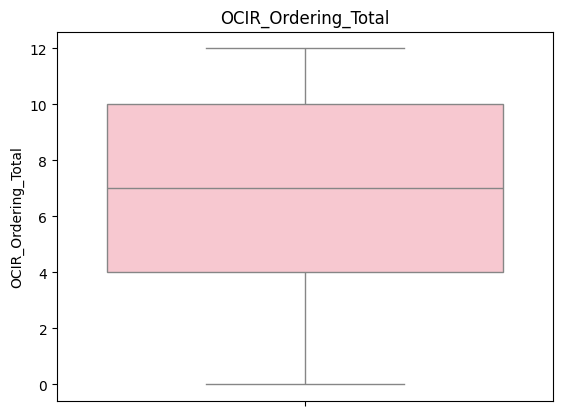

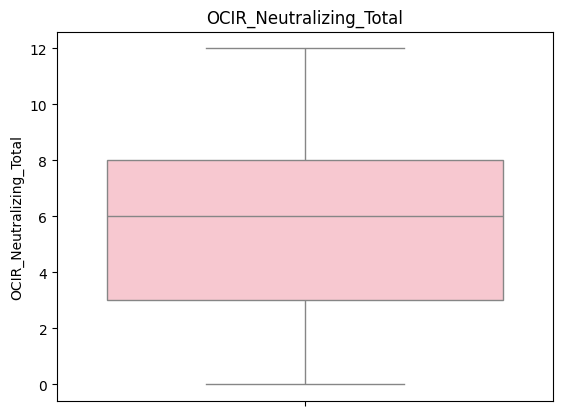

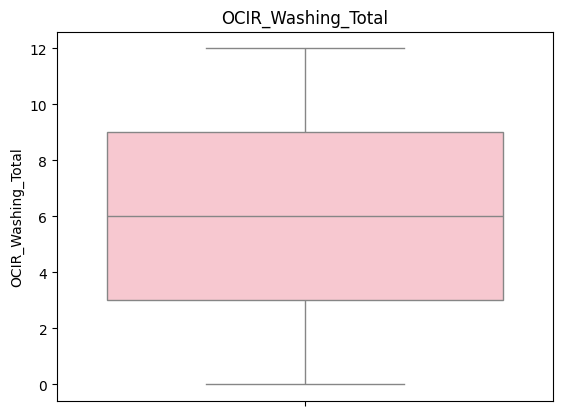

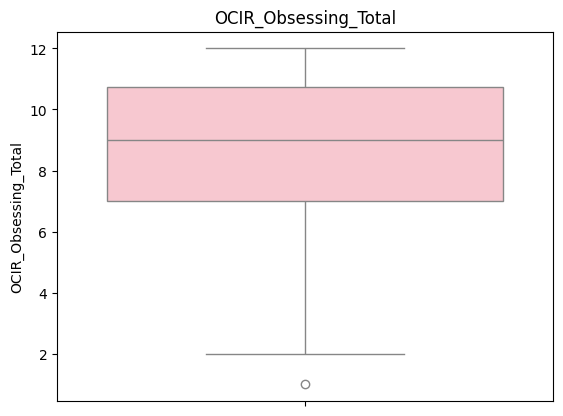

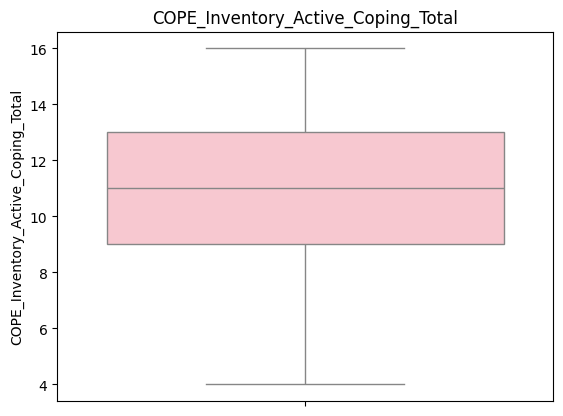

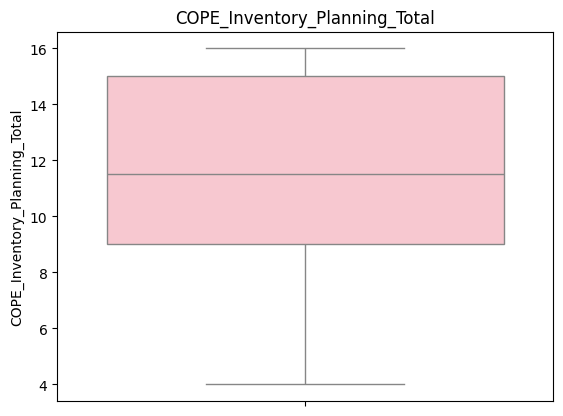

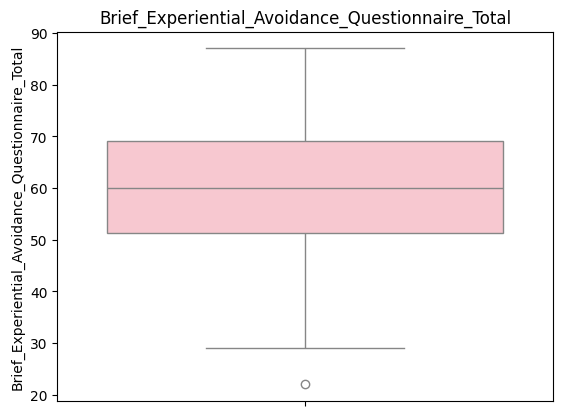

In [89]:
for col in numeric_cols:
    sns.boxplot(df[col], color="pink")
    plt.title(col)
    plt.ylabel(col)
    plt.show()

In [90]:
# dropping outliers 
df = df[(df['OCIR_Obsessing_Total'] != 1.0)& (df['HADS_ANX_Scale_Total']!=1.0)&(df["Brief_Experiential_Avoidance_Questionnaire_Total"]!=22.0)].copy()


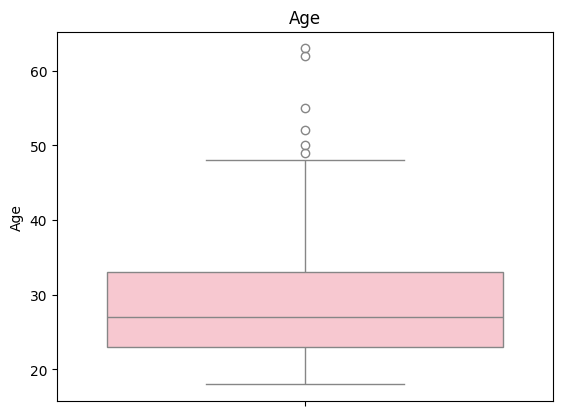

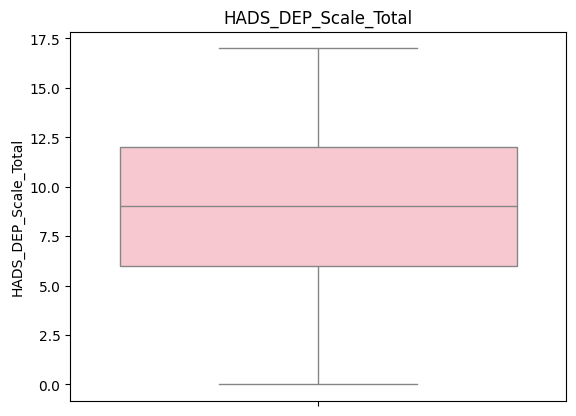

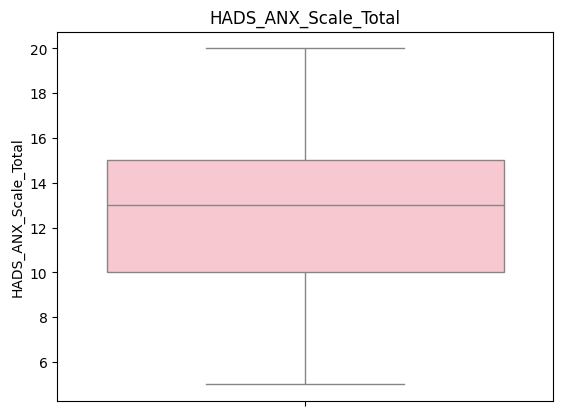

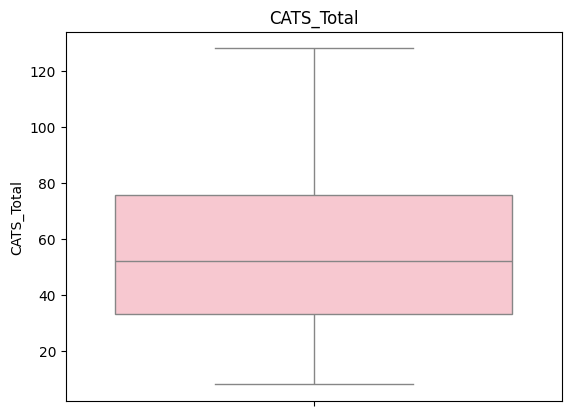

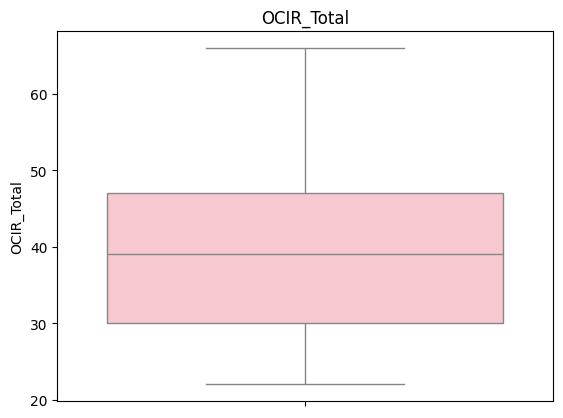

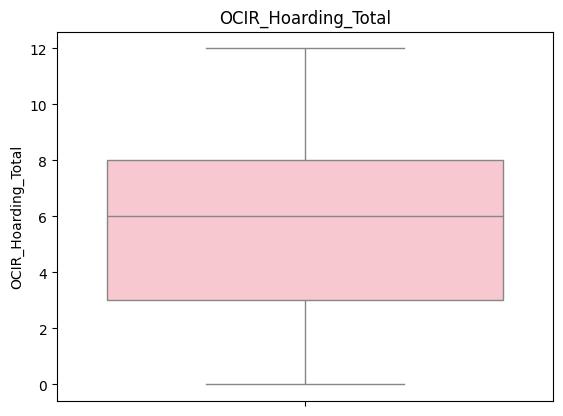

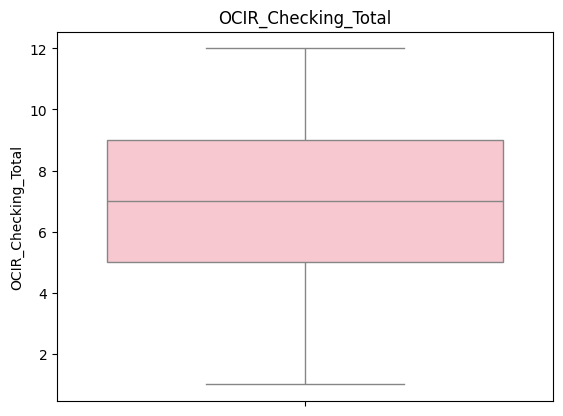

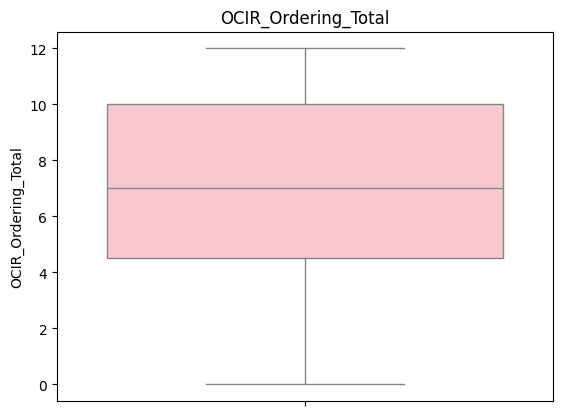

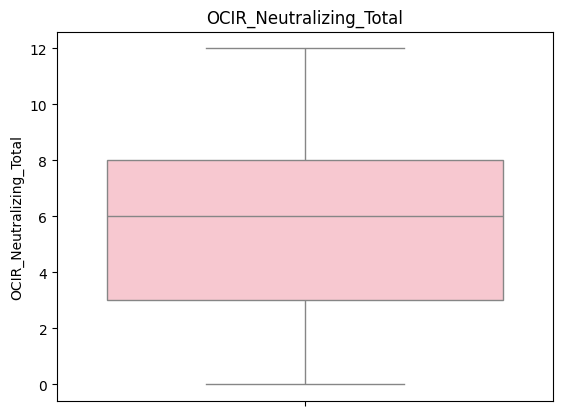

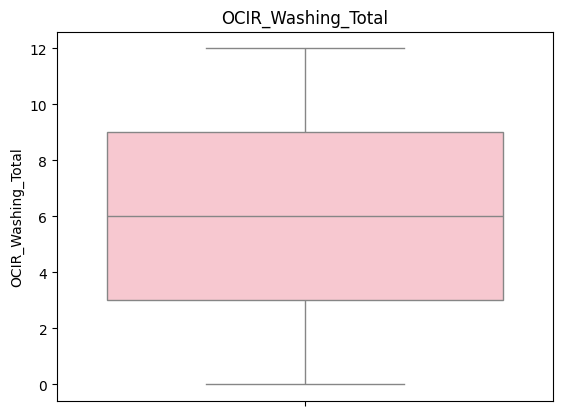

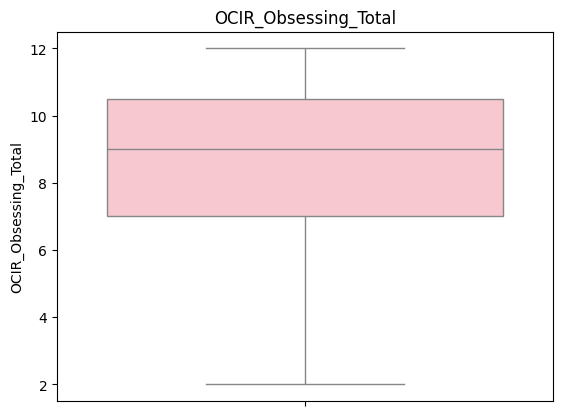

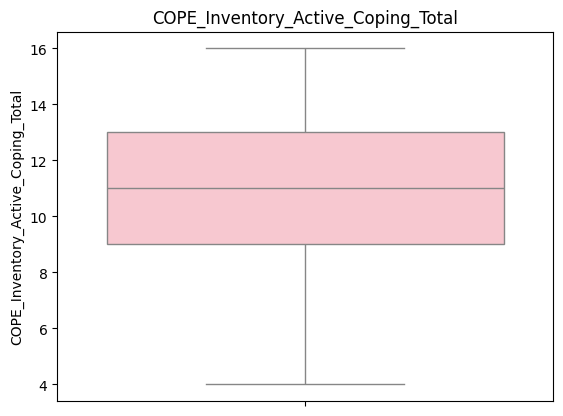

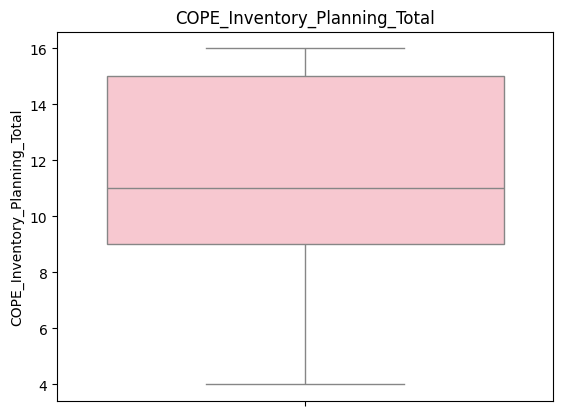

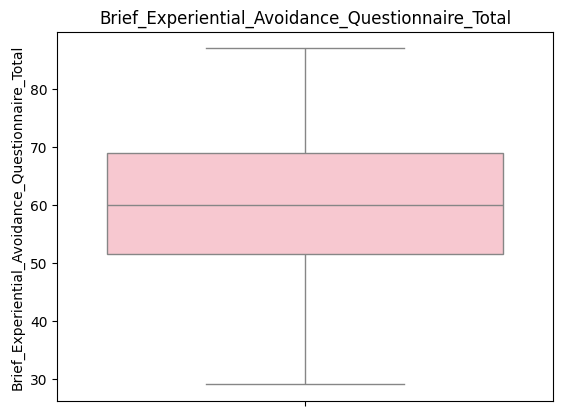

In [91]:
for col in numeric_cols:
    sns.boxplot(df[col], color="pink")
    plt.title(col)
    plt.ylabel(col)
    plt.show()

generally, individuals with anxiety symptoms are more than individuals with depression symptoms

In [92]:
df

,P_Num,Gender,Age,Ethnicity,Education,OCD_selfReport,TreatmentPresence,OCIR_Total,HADS_DEP_Scale_Total,HADS_ANX_Scale_Total,...,OCIR_Hoarding_Total,OCIR_Checking_Total,OCIR_Ordering_Total,OCIR_Neutralizing_Total,OCIR_Washing_Total,OCIR_Obsessing_Total,COPE_Inventory_Active_Coping_Total,COPE_Inventory_Planning_Total,COPE_Inventory_Total,Brief_Experiential_Avoidance_Questionnaire_Total
0,2,1,23.0,4,1,1,1,26.0,2.0,8.0,...,0.0,8.0,6.0,4.0,3.0,5.0,15.0,16.0,31.0,31.0
3,5,1,18.0,4,1,1,1,45.0,11.0,18.0,...,2.0,9.0,4.0,11.0,12.0,7.0,10.0,12.0,22.0,77.0
4,6,1,19.0,4,2,1,1,22.0,15.0,17.0,...,4.0,1.0,3.0,0.0,12.0,2.0,8.0,6.0,14.0,87.0
5,7,2,41.0,4,1,1,1,22.0,8.0,14.0,...,2.0,2.0,3.0,0.0,5.0,10.0,8.0,9.0,17.0,69.0
6,10,1,22.0,4,1,1,2,41.0,4.0,12.0,...,2.0,10.0,8.0,8.0,9.0,4.0,7.0,8.0,15.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,368,1,25.0,2,1,2,4,43.0,7.0,17.0,...,9.0,11.0,6.0,6.0,5.0,6.0,14.0,15.0,29.0,77.0
145,382,1,33.0,3,1,2,4,28.0,15.0,14.0,...,0.0,7.0,9.0,4.0,0.0,8.0,14.0,15.0,29.0,53.0
146,384,1,27.0,1,1,2,4,31.0,14.0,13.0,...,9.0,5.0,5.0,2.0,1.0,9.0,12.0,11.0,23.0,58.0
147,387,2,42.0,4,1,2,4,37.0,1.0,6.0,...,6.0,6.0,9.0,7.0,5.0,4.0,10.0,13.0,23.0,54.0


In [93]:
df[
    "OCIR_Obsessing_Total"
].min()  # though 2 is too low it is a valid answer in the scale

np.float64(2.0)

In [94]:
df[
    "HADS_ANX_Scale_Total"
].min()

np.float64(5.0)

In [95]:
df[
    "Brief_Experiential_Avoidance_Questionnaire_Total"
].min()

np.float64(29.0)

In [96]:
df["Brief_Experiential_Avoidance_Questionnaire_Total"].corr(df["OCIR_Total"])

np.float64(0.17775182752515703)

In [97]:
df["OCIR_Total"].corr(df["HADS_DEP_Scale_Total"])

np.float64(0.24379267986237202)

In [98]:
df["OCIR_Total"].corr(df["HADS_ANX_Scale_Total"])

np.float64(0.3218383944016866)

In [99]:
correlation = df["Brief_Experiential_Avoidance_Questionnaire_Total"].corr(
    df["HADS_DEP_Scale_Total"]
)
print(correlation)

0.44781437849515093


In [100]:
categorical_variables = [
    "Ethnicity",
    "Gender",
    "Education",
    "OCD_selfReport",
    "TreatmentPresence",
    "depression_diagnosis_type",
    "anxiety_diagnosis_type",
]

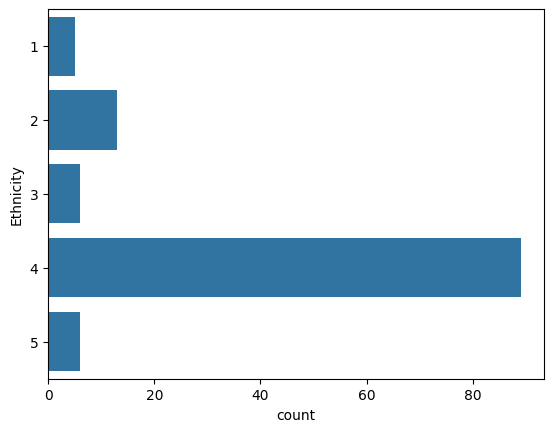

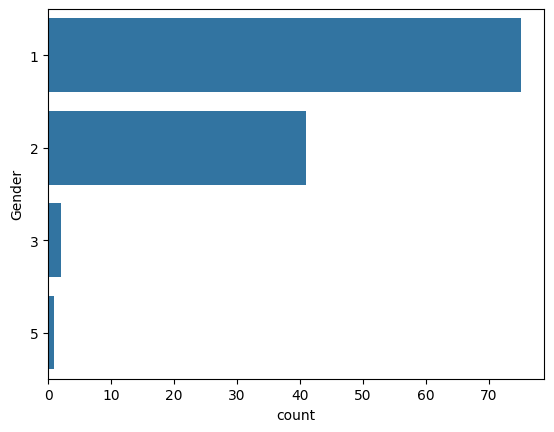

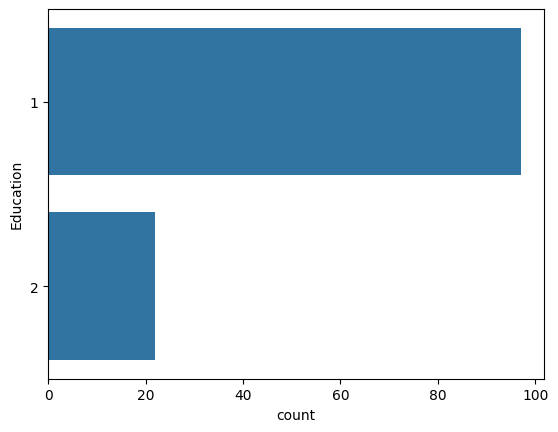

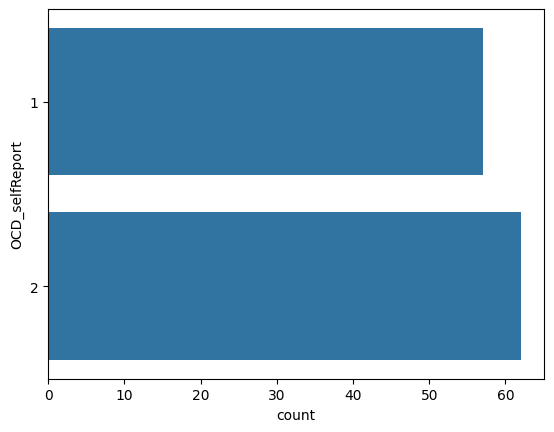

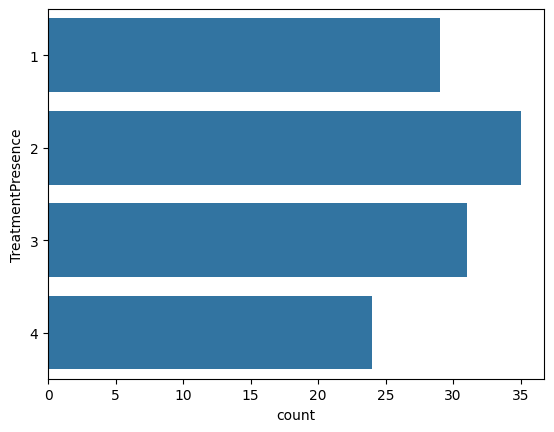

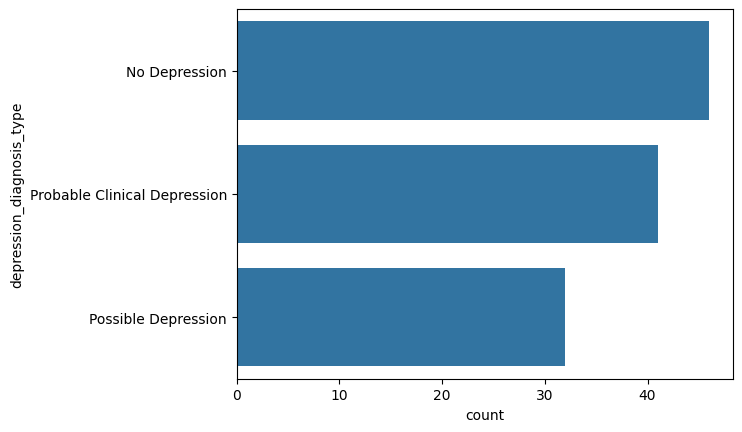

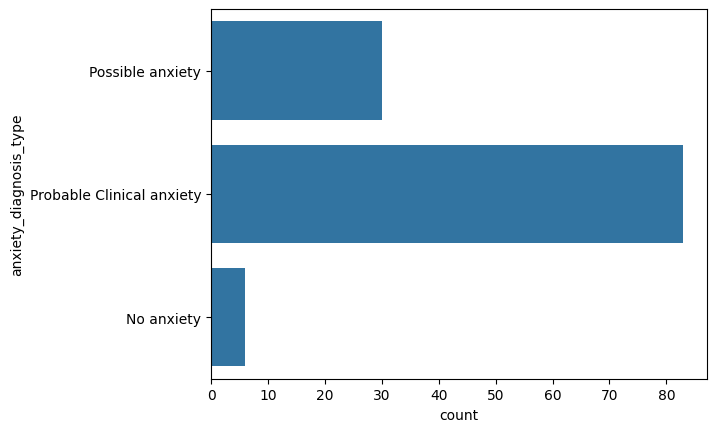

In [101]:
for col in categorical_variables:
    sns.countplot(y=col, data=df)
    plt.show()

* Most of them are female
* For their education, most of them went to university 
* Individuals with probable clinical anxiety are the highest (HADS-anxiety>=11)
* For depression, possible depression is the lowest category(HADS-depression 8-10)

In [102]:
def comorbidity_type(row):
    if (row["anxiety_diagnosis_type"] == "Probable Clinical anxiety") and (
        row["depression_diagnosis_type"] == "Probable Clinical Depression"
    ):
        return "probable clinical anxiety and probable clinical depression"
    elif (row["anxiety_diagnosis_type"] == "Possible anxiety") and (
        row["depression_diagnosis_type"] == "Possible Depression"
    ):
        return "possible anxiety and possible depression"
    elif (row["anxiety_diagnosis_type"] == "No anxiety") and (
        row["depression_diagnosis_type"] == "No Depression"
    ):  # No anxiety
        return "no anxiety or depression"
    elif (row["anxiety_diagnosis_type"] == "No anxiety") and (
        row["depression_diagnosis_type"] == "Probable Clinical Depression"
    ):
        return "no anxiety but probable clinical depression"
    elif (row["anxiety_diagnosis_type"] == "No anxiety") and (
        row["depression_diagnosis_type"] == "Possible Depression"
    ):
        return "no anxiety but possible depression"
    elif (row["anxiety_diagnosis_type"] == "Probable Clinical anxiety") and (
        row["depression_diagnosis_type"] == "No Depression"
    ):
        return "probable clinical anxiety but no depression"
    elif (row["anxiety_diagnosis_type"] == "Probable Clinical anxiety") and (
        row["depression_diagnosis_type"] == "Possible Depression"
    ):
        return "probable clinical anxiety and possible depression"
    elif (row["anxiety_diagnosis_type"] == "Possible anxiety") and (
        row["depression_diagnosis_type"] == "No Depression"
    ):
        return "possible anxiety but no depression"
    else:  # (row['anxiety_diagnosis_type']== 'Possible anxiety') and (row['depression_diagnosis_type']=='Probable Clinical Depression'):
        return "possible anxiety and probable clinical depression"


df["comorbidity_type"] = df.apply(comorbidity_type, axis=1)  ##

In [103]:
df

,P_Num,Gender,Age,Ethnicity,Education,OCD_selfReport,TreatmentPresence,OCIR_Total,HADS_DEP_Scale_Total,HADS_ANX_Scale_Total,...,OCIR_Checking_Total,OCIR_Ordering_Total,OCIR_Neutralizing_Total,OCIR_Washing_Total,OCIR_Obsessing_Total,COPE_Inventory_Active_Coping_Total,COPE_Inventory_Planning_Total,COPE_Inventory_Total,Brief_Experiential_Avoidance_Questionnaire_Total,comorbidity_type
0,2,1,23.0,4,1,1,1,26.0,2.0,8.0,...,8.0,6.0,4.0,3.0,5.0,15.0,16.0,31.0,31.0,possible anxiety but no depression
3,5,1,18.0,4,1,1,1,45.0,11.0,18.0,...,9.0,4.0,11.0,12.0,7.0,10.0,12.0,22.0,77.0,probable clinical anxiety and probable clinica...
4,6,1,19.0,4,2,1,1,22.0,15.0,17.0,...,1.0,3.0,0.0,12.0,2.0,8.0,6.0,14.0,87.0,probable clinical anxiety and probable clinica...
5,7,2,41.0,4,1,1,1,22.0,8.0,14.0,...,2.0,3.0,0.0,5.0,10.0,8.0,9.0,17.0,69.0,probable clinical anxiety and possible depression
6,10,1,22.0,4,1,1,2,41.0,4.0,12.0,...,10.0,8.0,8.0,9.0,4.0,7.0,8.0,15.0,67.0,probable clinical anxiety but no depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,368,1,25.0,2,1,2,4,43.0,7.0,17.0,...,11.0,6.0,6.0,5.0,6.0,14.0,15.0,29.0,77.0,probable clinical anxiety but no depression
145,382,1,33.0,3,1,2,4,28.0,15.0,14.0,...,7.0,9.0,4.0,0.0,8.0,14.0,15.0,29.0,53.0,probable clinical anxiety and probable clinica...
146,384,1,27.0,1,1,2,4,31.0,14.0,13.0,...,5.0,5.0,2.0,1.0,9.0,12.0,11.0,23.0,58.0,probable clinical anxiety and probable clinica...
147,387,2,42.0,4,1,2,4,37.0,1.0,6.0,...,6.0,9.0,7.0,5.0,4.0,10.0,13.0,23.0,54.0,no anxiety or depression


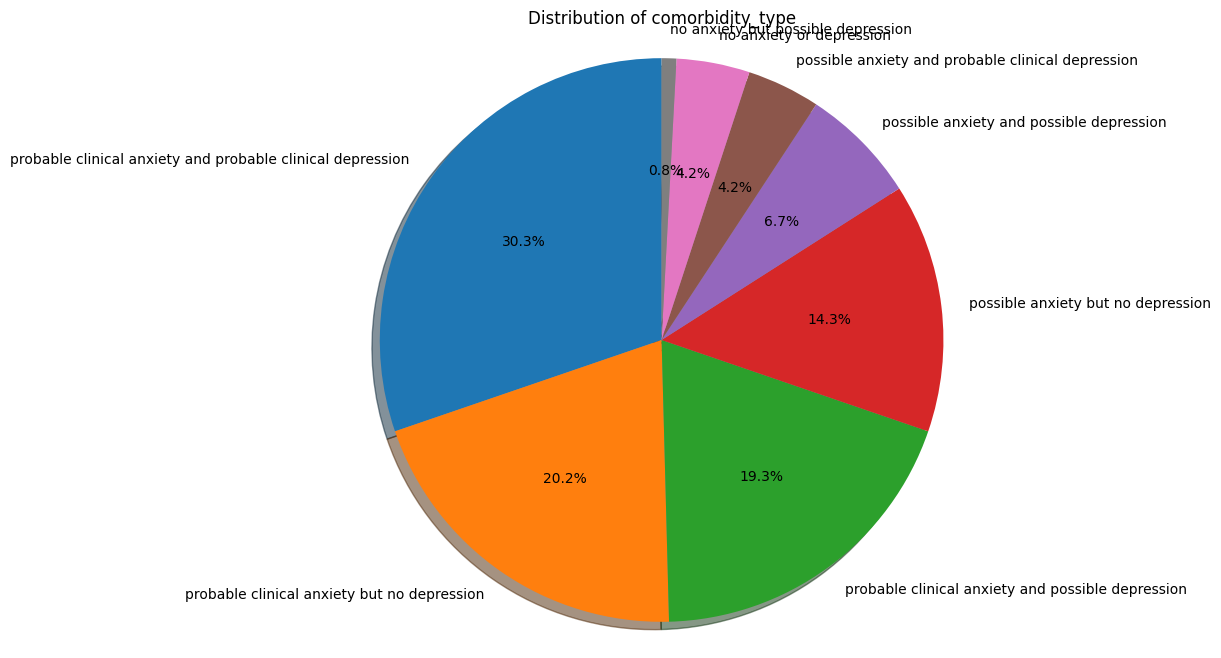

In [104]:
sizes = df["comorbidity_type"].value_counts()
labels = sizes.index  

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Distribution of comorbidity_type")  
plt.axis("equal")  
plt.show()

In [105]:
no_anx_dep = df[df["comorbidity_type"] == "no anxiety or depression"]

In [106]:
possible_anx_prob_dep = df[
    df["comorbidity_type"] == "possible anxiety and probable clinical depression"
]

In [107]:
possible_anx_dep = df[
    df["comorbidity_type"] == "possible anxiety and possible depression"
]

In [108]:
possible_anx_no_dep = df[df["comorbidity_type"] == "possible anxiety but no depression"]

In [109]:
prob_anx_possible_depression = df[
    df["comorbidity_type"] == "probable clinical anxiety and possible depression"
]

In [110]:
prob_anx_no_dep = df[
    df["comorbidity_type"] == "probable clinical anxiety but no depression"
]

In [111]:
prob_anx_prob_dep = [
    df["comorbidity_type"]
    == "probable clinical anxiety and probable clinical depression"
]

In [112]:
def comorbidity_type_summarized(row):
    if (row["HADS_ANX_Scale_Total"] >= 8) and (row["HADS_DEP_Scale_Total"] >= 8):
        return "anxiety and depression present"
    elif (row["HADS_ANX_Scale_Total"] >= 8) and (row["HADS_DEP_Scale_Total"] <= 7):
        return "anxiety present depression absent"
    elif (row["HADS_ANX_Scale_Total"] <= 7) and (row["HADS_DEP_Scale_Total"] >= 8):
        return "anxiety absent depression present"
    else:
        return "anxiety and depression absent"


df["comorbidity_type_summarized"] = df.apply(comorbidity_type_summarized, axis=1)

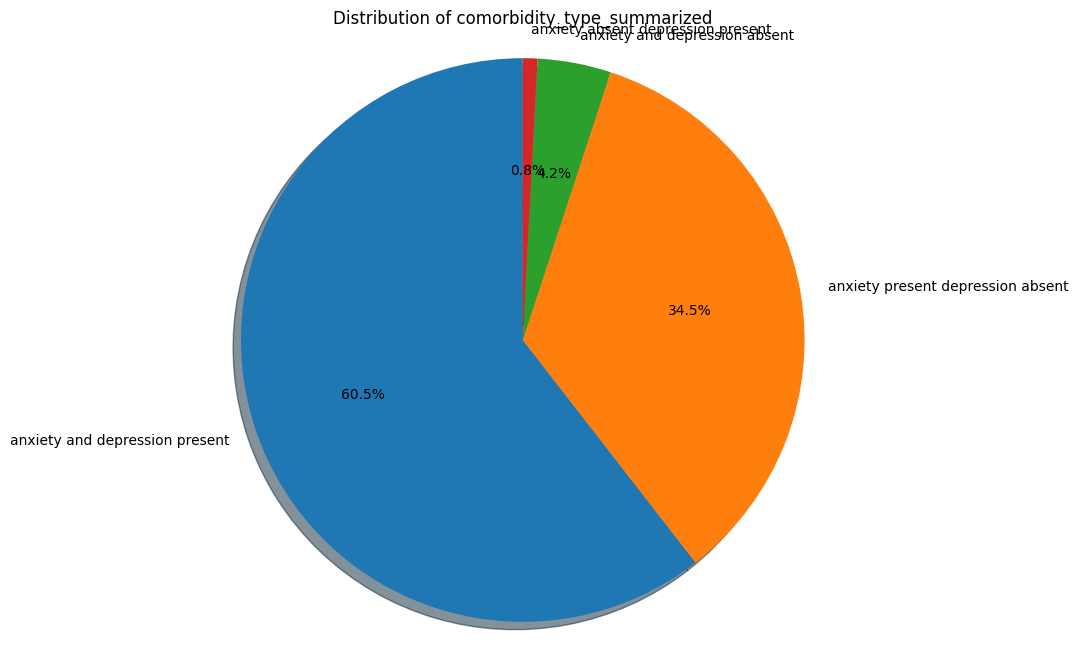

In [113]:
sizes = df["comorbidity_type_summarized"].value_counts()
labels = sizes.index  # the index of sizes is the strings(names of categories),

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Distribution of comorbidity_type_summarized")
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()

we are going to compare between these two groups. anxiety and depression present, anxiety present depression absent

In [114]:
anx_and_dep_present = df[
    df["comorbidity_type_summarized"] == "anxiety and depression present"
]

In [115]:
df

,P_Num,Gender,Age,Ethnicity,Education,OCD_selfReport,TreatmentPresence,OCIR_Total,HADS_DEP_Scale_Total,HADS_ANX_Scale_Total,...,OCIR_Ordering_Total,OCIR_Neutralizing_Total,OCIR_Washing_Total,OCIR_Obsessing_Total,COPE_Inventory_Active_Coping_Total,COPE_Inventory_Planning_Total,COPE_Inventory_Total,Brief_Experiential_Avoidance_Questionnaire_Total,comorbidity_type,comorbidity_type_summarized
0,2,1,23.0,4,1,1,1,26.0,2.0,8.0,...,6.0,4.0,3.0,5.0,15.0,16.0,31.0,31.0,possible anxiety but no depression,anxiety present depression absent
3,5,1,18.0,4,1,1,1,45.0,11.0,18.0,...,4.0,11.0,12.0,7.0,10.0,12.0,22.0,77.0,probable clinical anxiety and probable clinica...,anxiety and depression present
4,6,1,19.0,4,2,1,1,22.0,15.0,17.0,...,3.0,0.0,12.0,2.0,8.0,6.0,14.0,87.0,probable clinical anxiety and probable clinica...,anxiety and depression present
5,7,2,41.0,4,1,1,1,22.0,8.0,14.0,...,3.0,0.0,5.0,10.0,8.0,9.0,17.0,69.0,probable clinical anxiety and possible depression,anxiety and depression present
6,10,1,22.0,4,1,1,2,41.0,4.0,12.0,...,8.0,8.0,9.0,4.0,7.0,8.0,15.0,67.0,probable clinical anxiety but no depression,anxiety present depression absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,368,1,25.0,2,1,2,4,43.0,7.0,17.0,...,6.0,6.0,5.0,6.0,14.0,15.0,29.0,77.0,probable clinical anxiety but no depression,anxiety present depression absent
145,382,1,33.0,3,1,2,4,28.0,15.0,14.0,...,9.0,4.0,0.0,8.0,14.0,15.0,29.0,53.0,probable clinical anxiety and probable clinica...,anxiety and depression present
146,384,1,27.0,1,1,2,4,31.0,14.0,13.0,...,5.0,2.0,1.0,9.0,12.0,11.0,23.0,58.0,probable clinical anxiety and probable clinica...,anxiety and depression present
147,387,2,42.0,4,1,2,4,37.0,1.0,6.0,...,9.0,7.0,5.0,4.0,10.0,13.0,23.0,54.0,no anxiety or depression,anxiety and depression absent


In [116]:
anx_present_dep_absent = df[
    df["comorbidity_type_summarized"] == "anxiety present depression absent"
]

In [117]:
anx_and_dep_absent = df[
    df["comorbidity_type_summarized"] == "anxiety and depression absent"
]

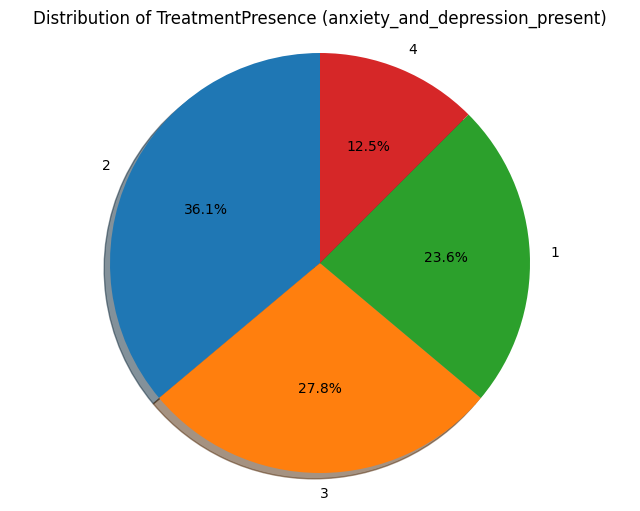

In [118]:
sizes = anx_and_dep_present["TreatmentPresence"].value_counts()
labels = sizes.index  # the index of sizes is the strings(names of categories),

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Distribution of TreatmentPresence (anxiety_and_depression_present)")
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()

anxiety_and_depression_symptoms_present:
most individuals (36.1%) have had treatment that is partly focused on OCD
27.8% have had mental health treatment but it was not focused on OCD 
23.6% have had treatment for OCD 

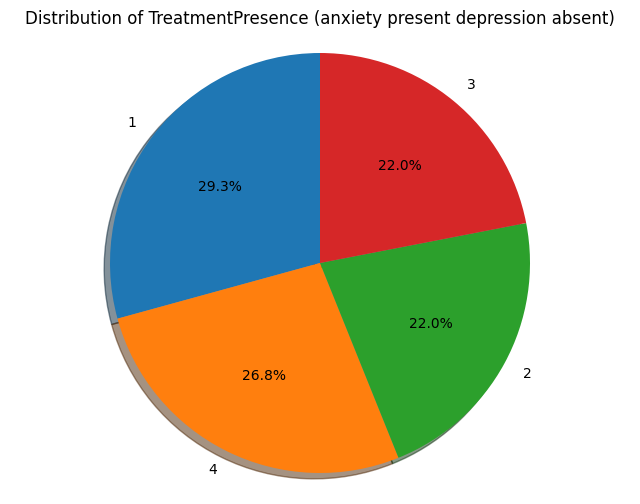

In [119]:
sizes = anx_present_dep_absent["TreatmentPresence"].value_counts()
labels = sizes.index  # the index of sizes is the strings(names of categories),

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Distribution of TreatmentPresence (anxiety present depression absent)")
plt.axis("equal")  # Ensures the pie chart is circular
plt.show()

anxiety_symptoms_present_depression_symptoms_absent
most individual 29.3% have had treatment for OCD, 26.8% have not had mental health treatment

In [120]:
anx_and_dep_present["Gender"].value_counts()  # 47

Gender
1    45
2    25
5     1
3     1
Name: count, dtype: int64

In [121]:
anx_present_dep_absent["Gender"].value_counts()  # 32

Gender
1    30
2    10
3     1
Name: count, dtype: int64

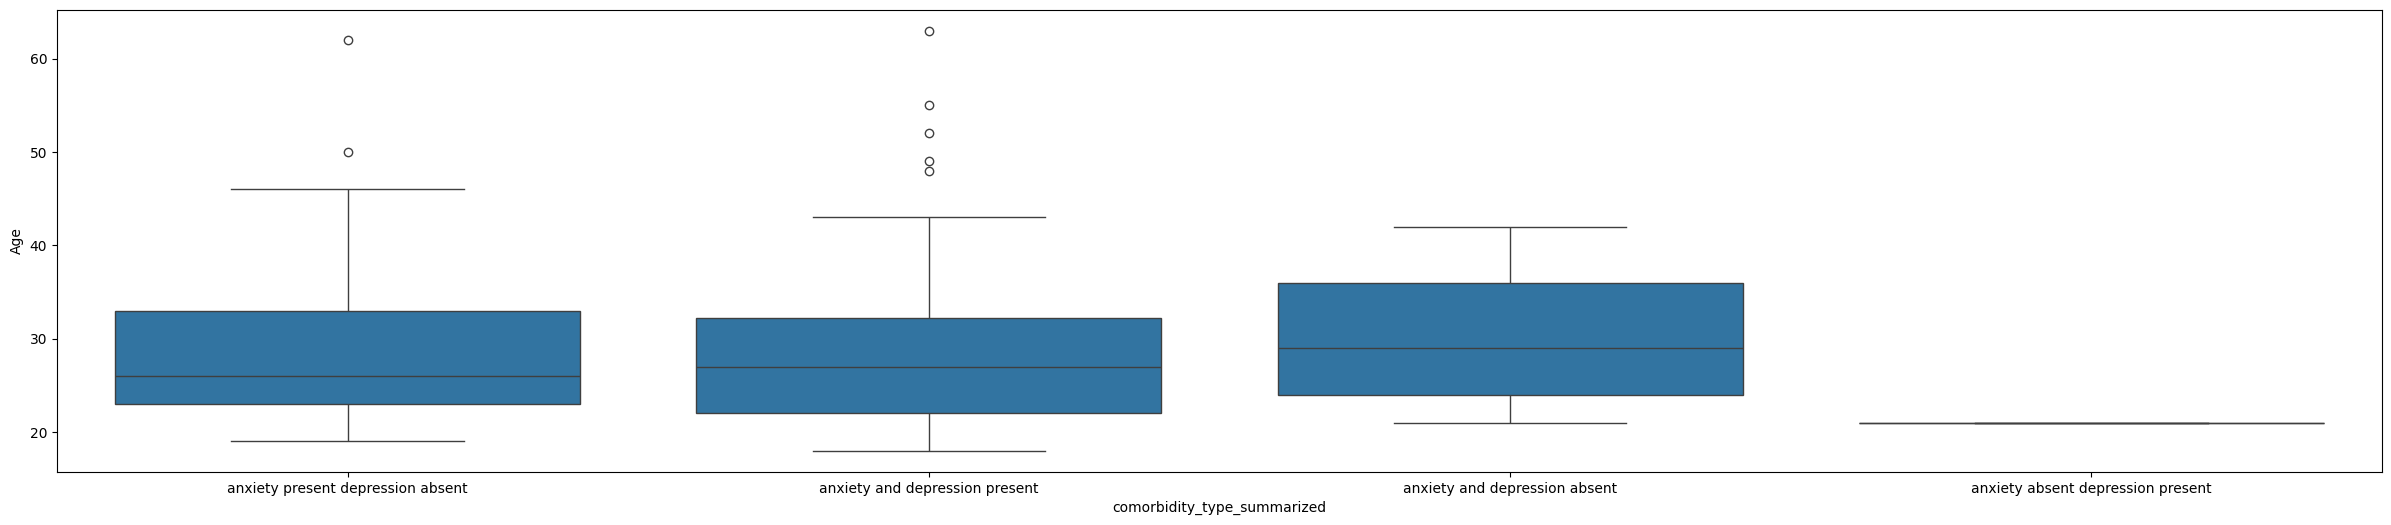

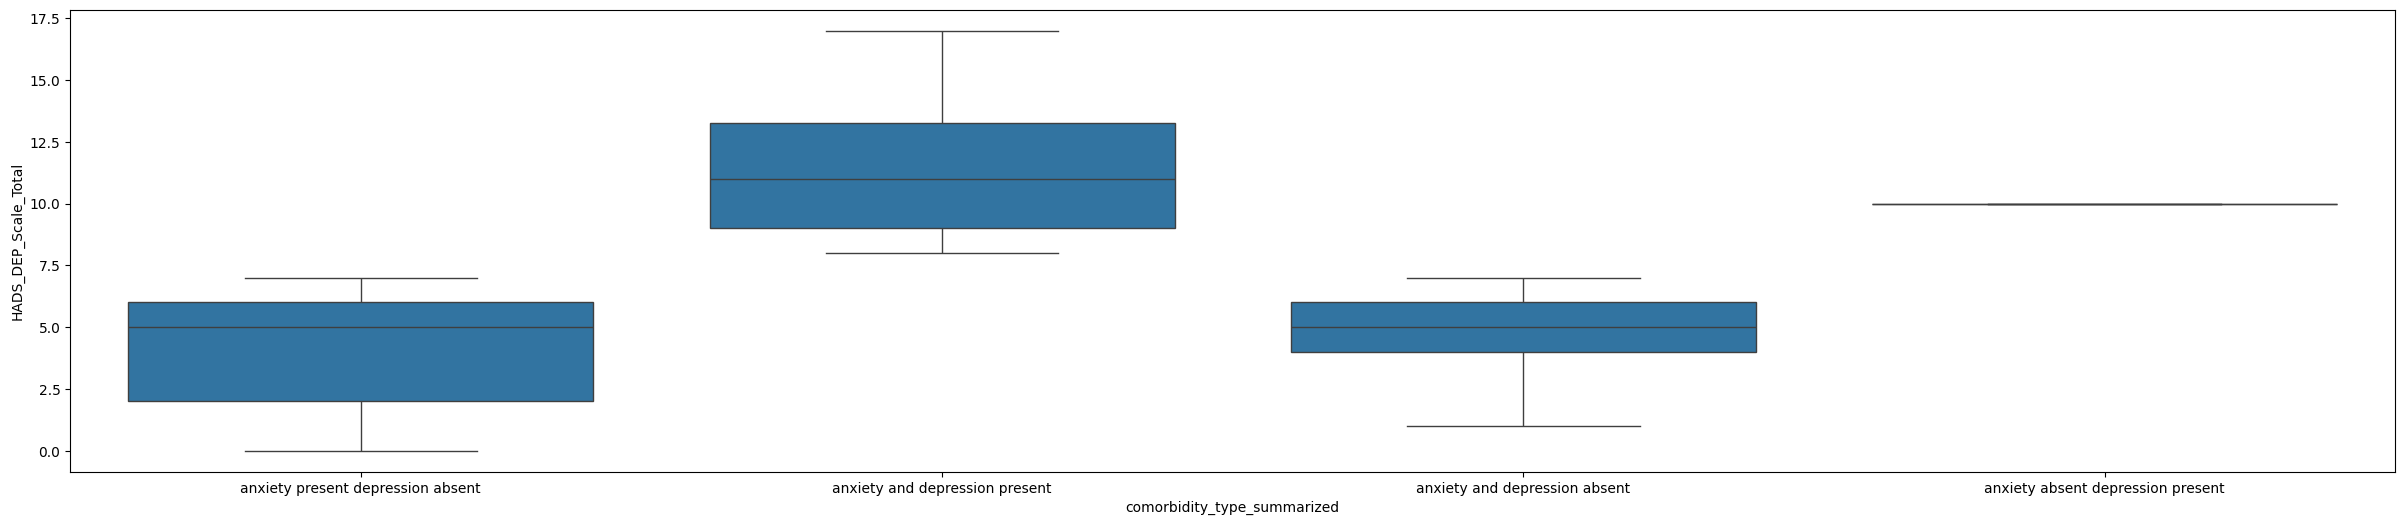

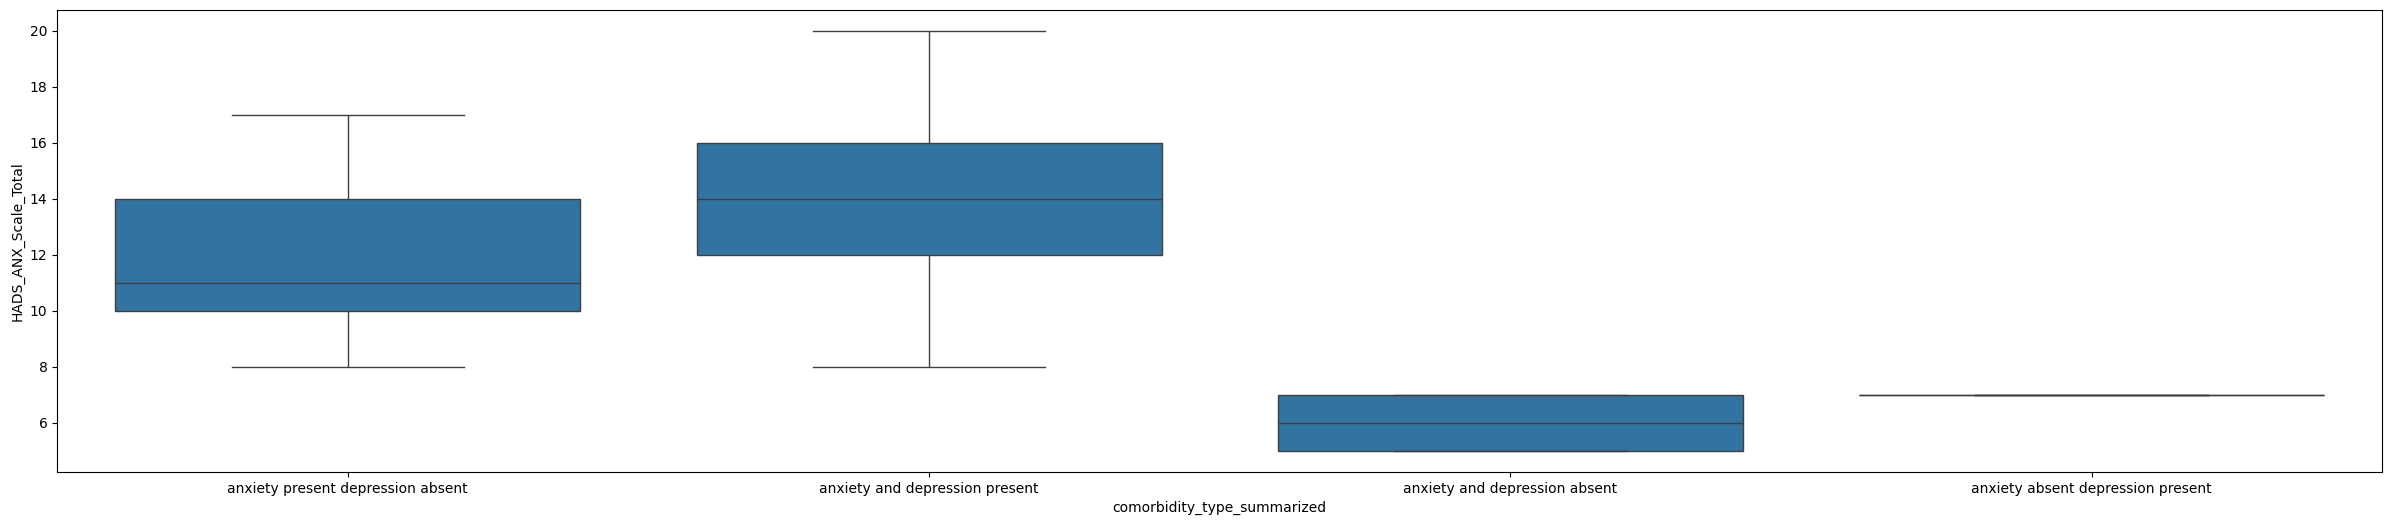

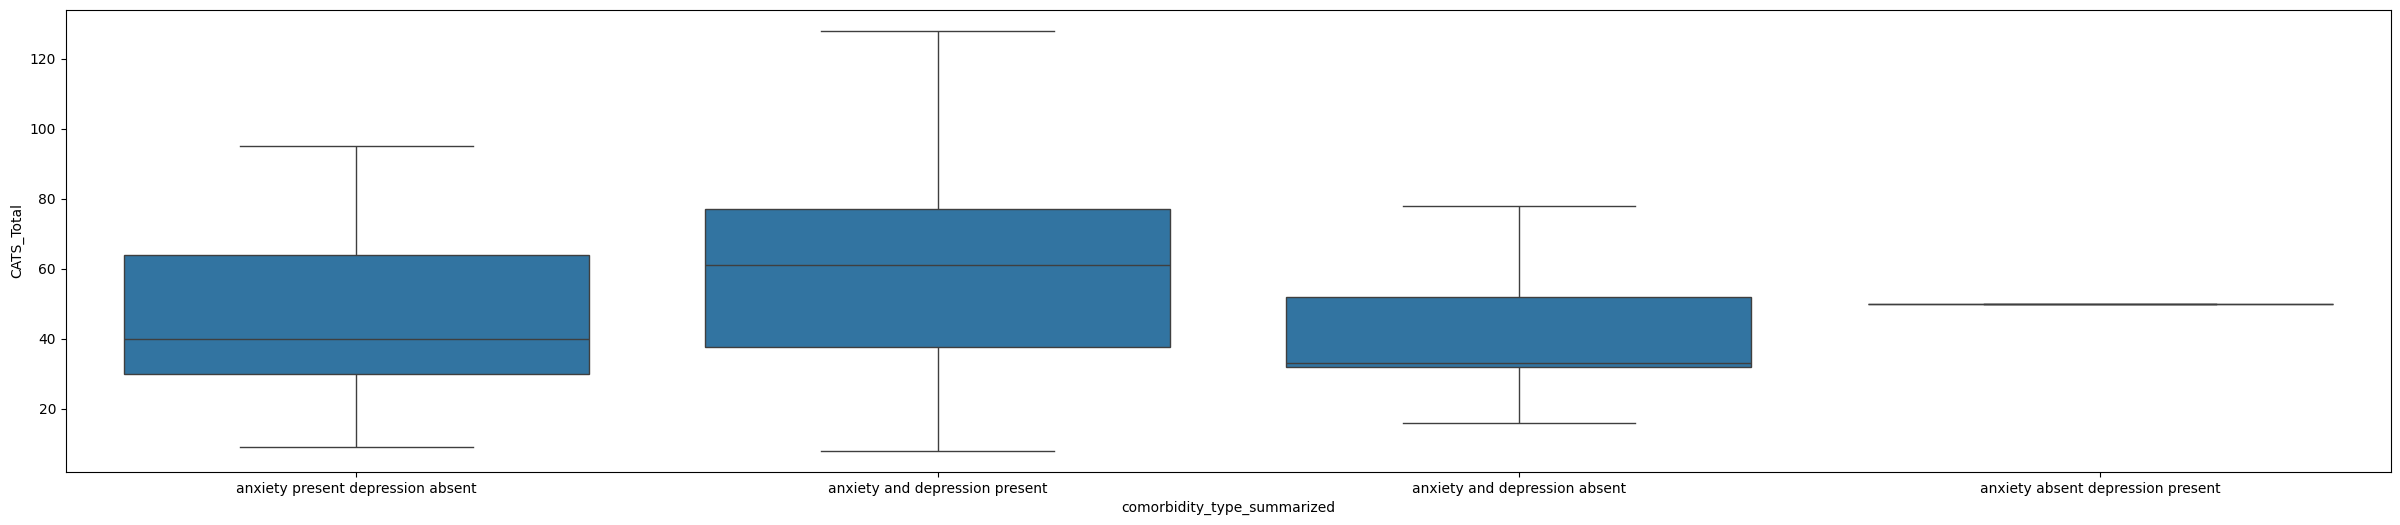

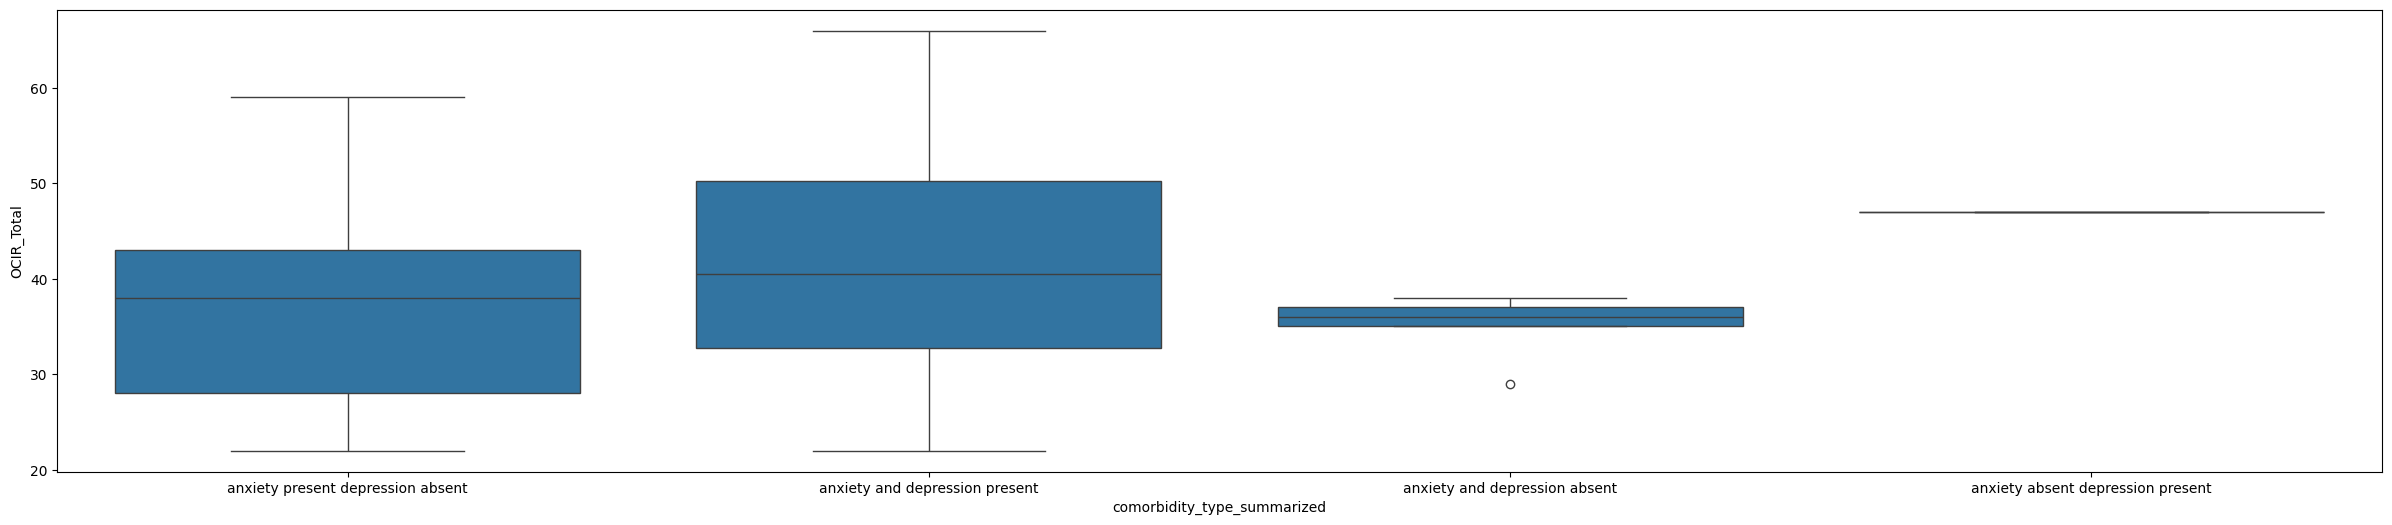

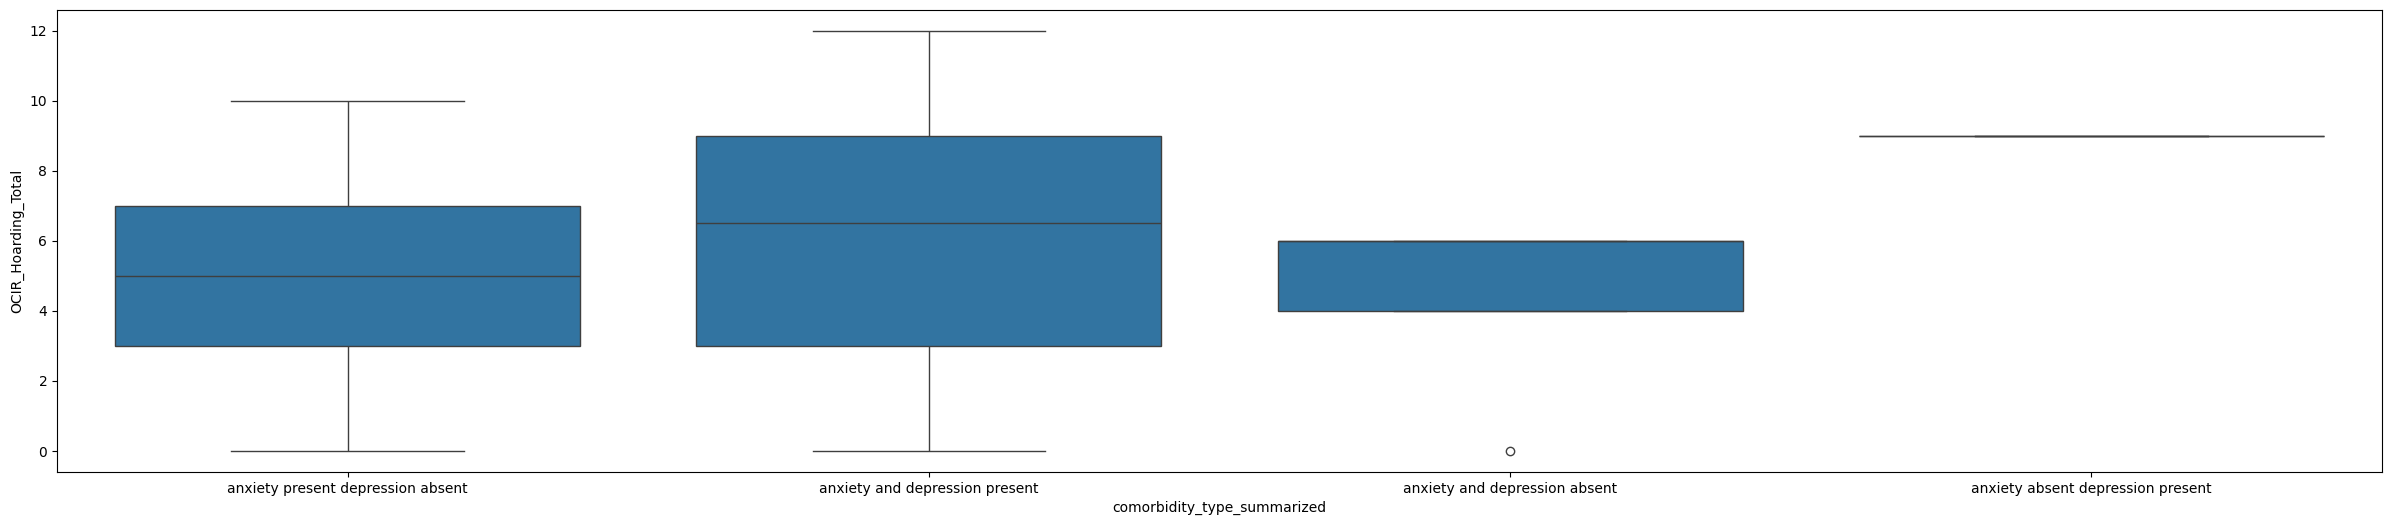

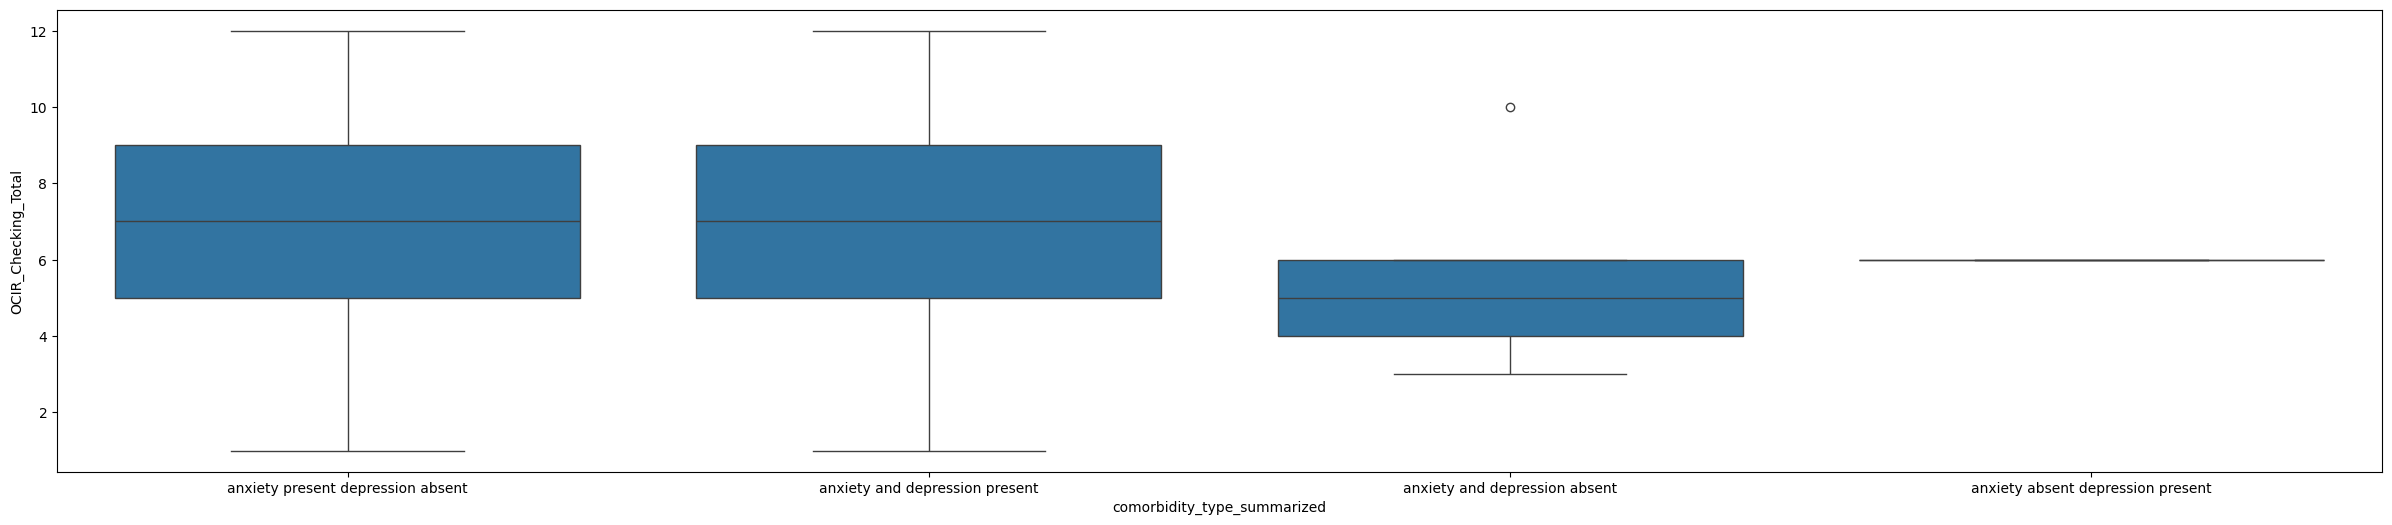

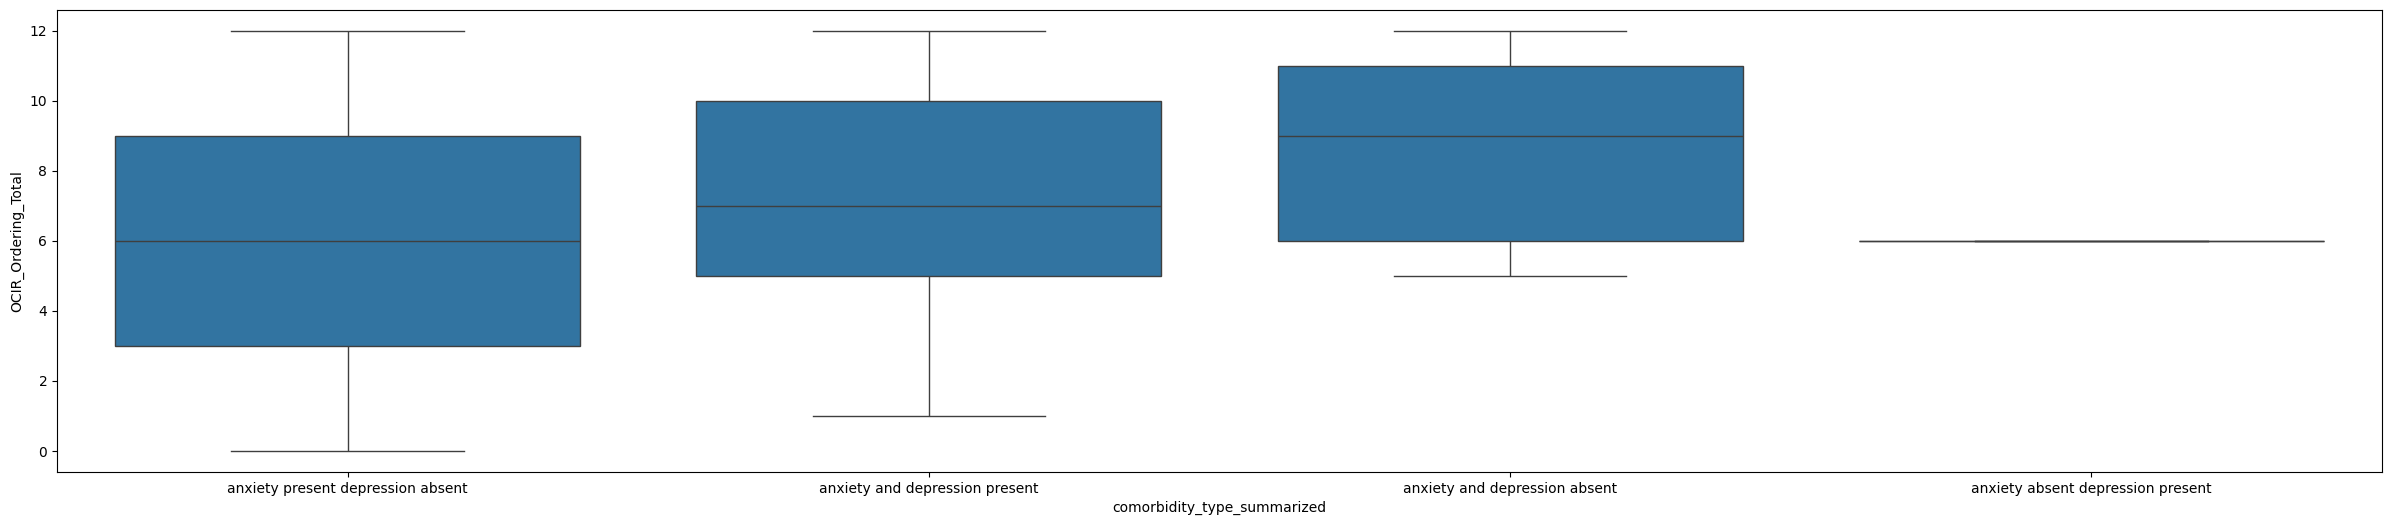

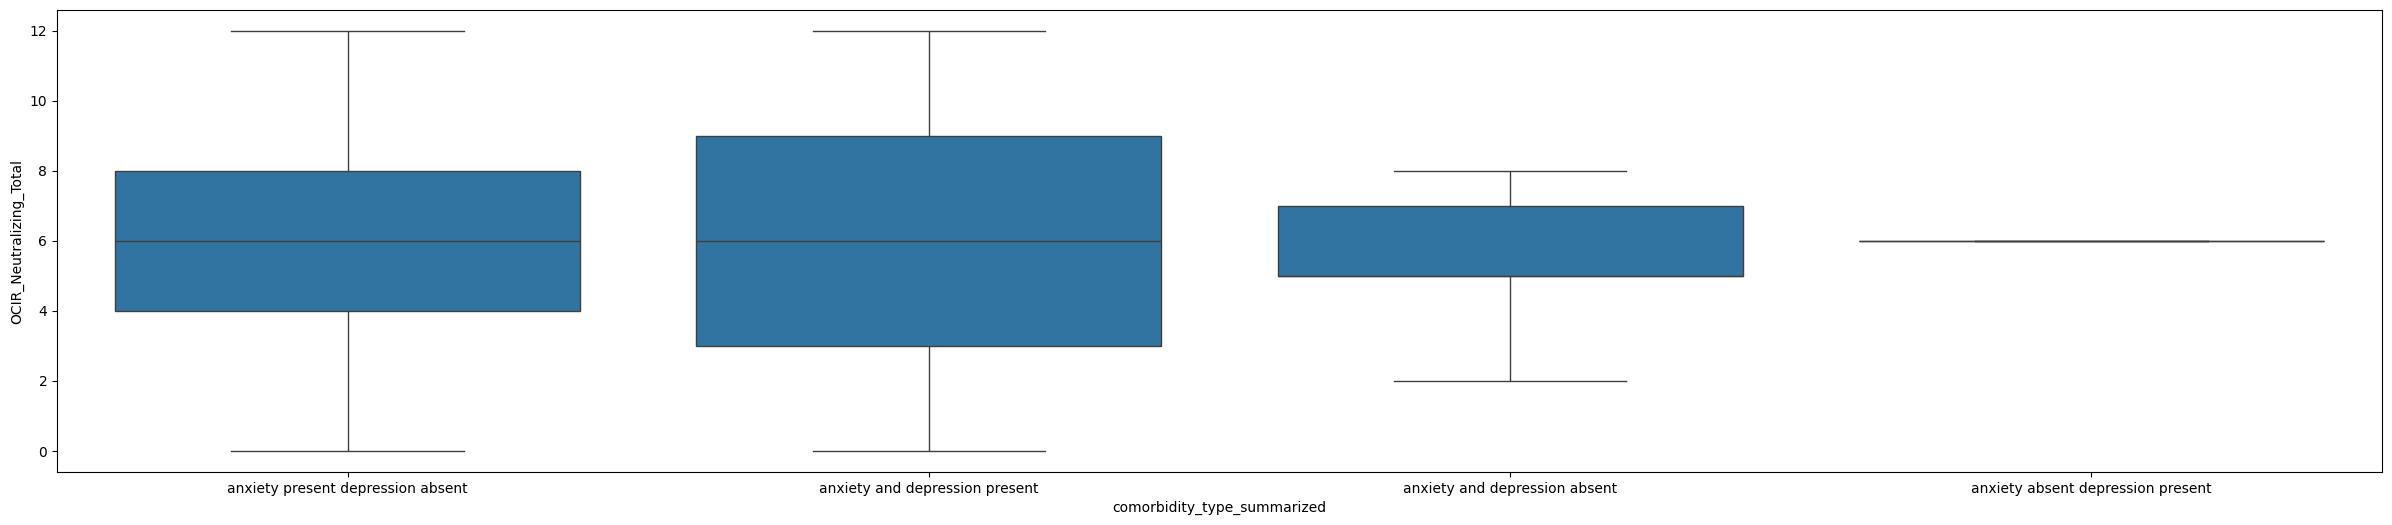

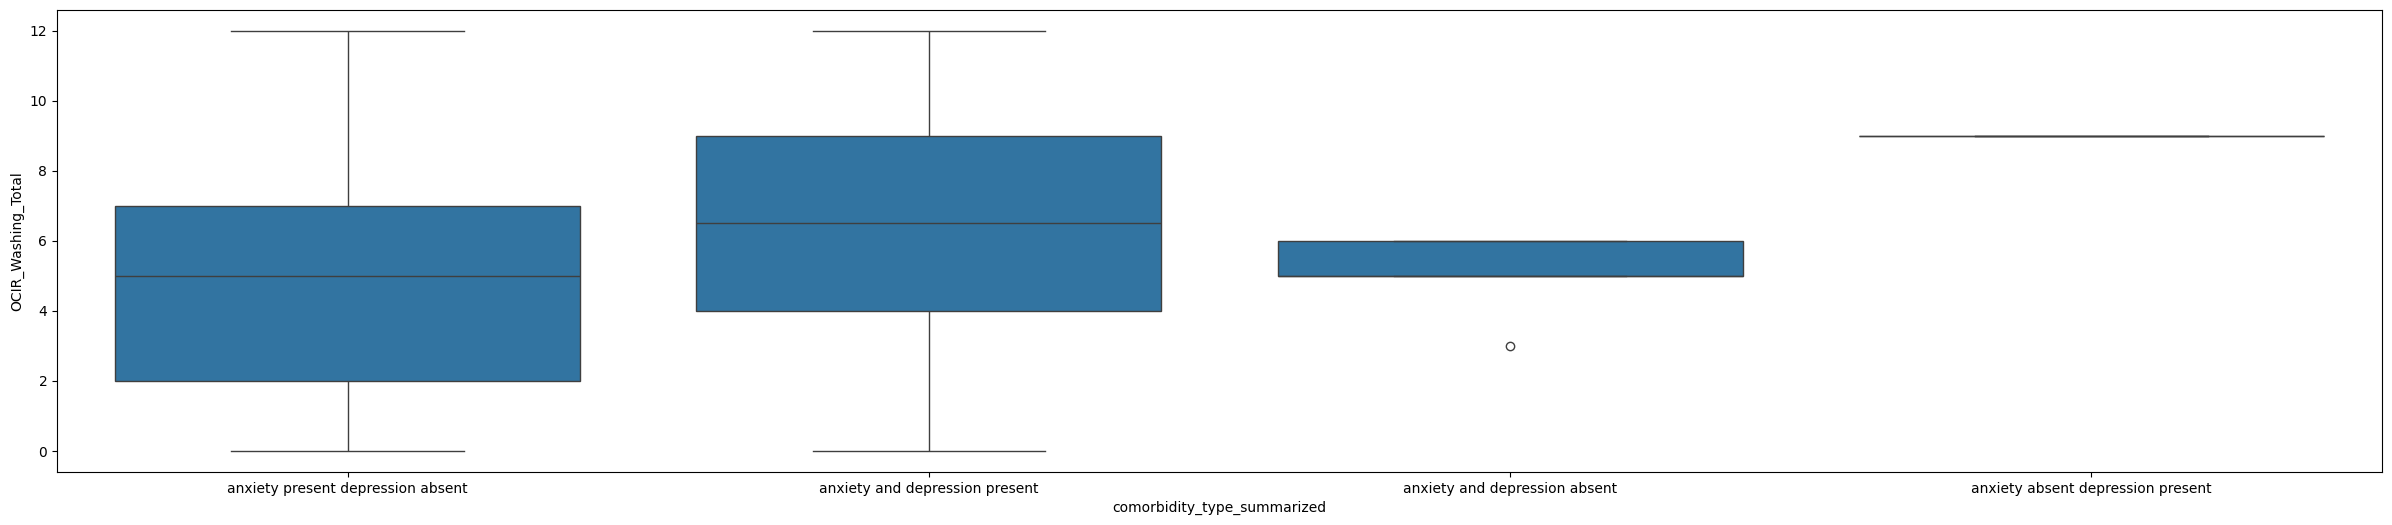

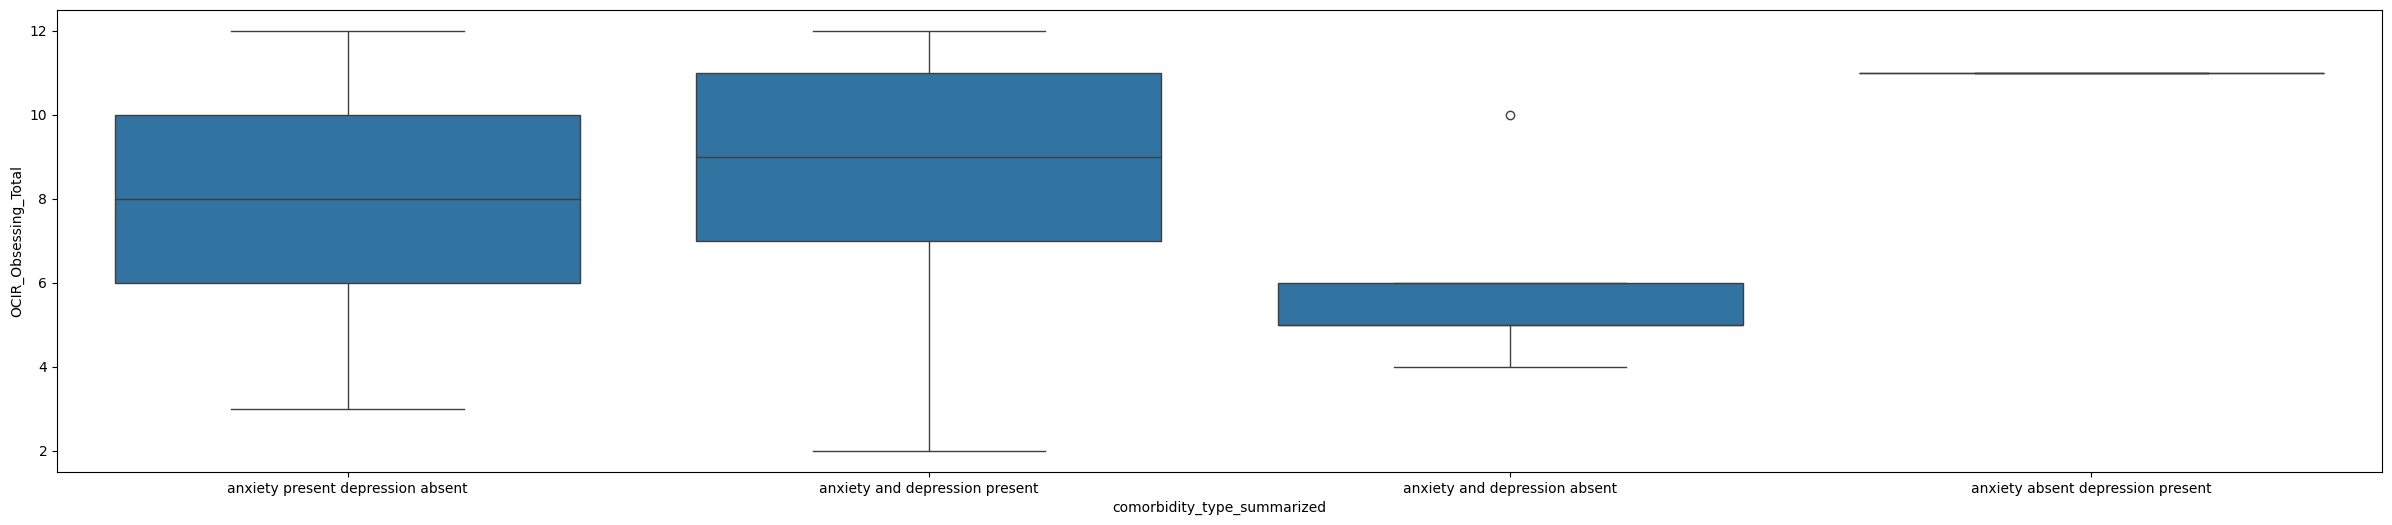

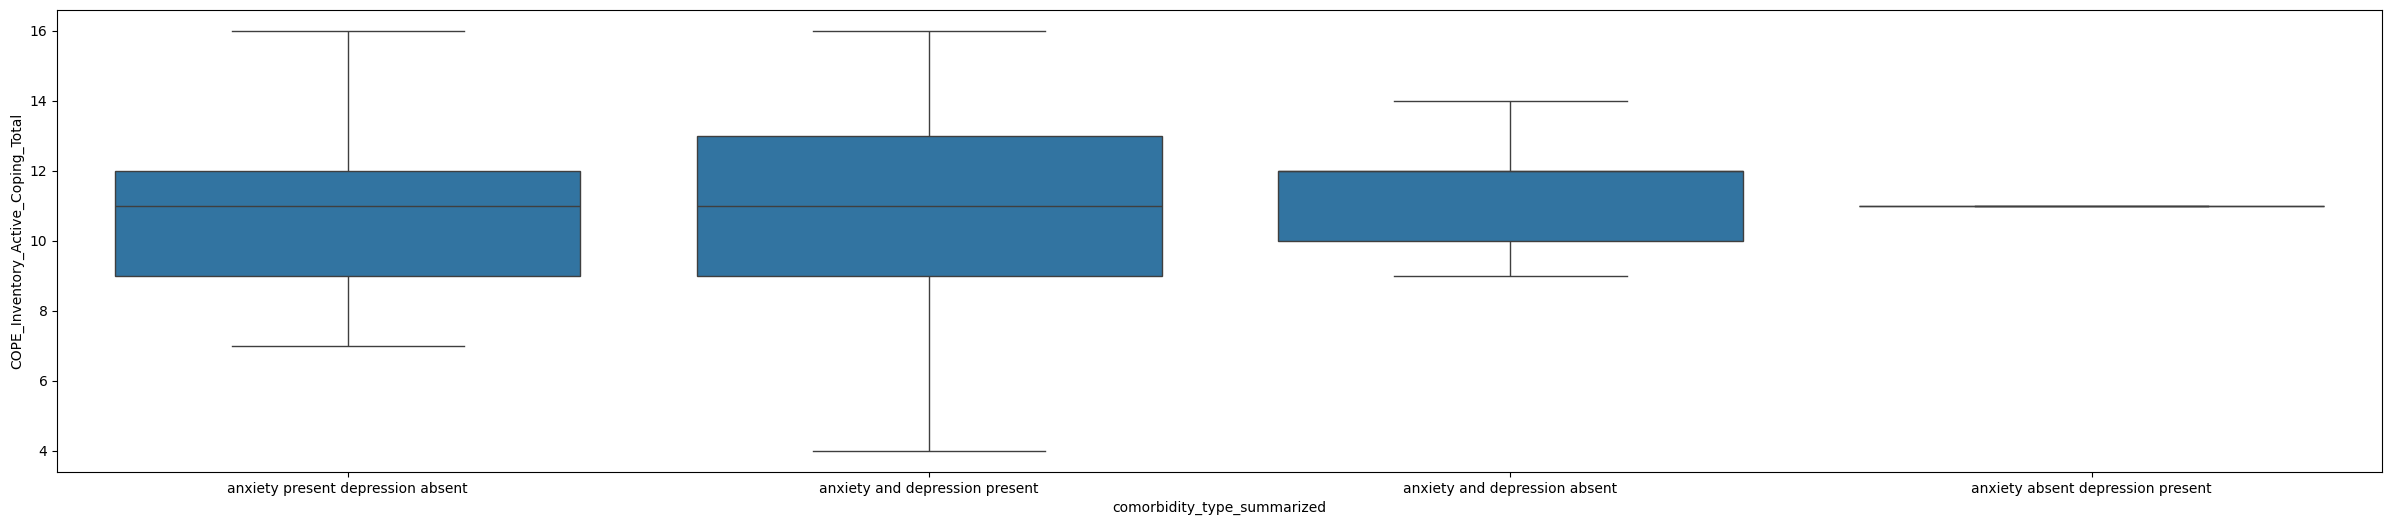

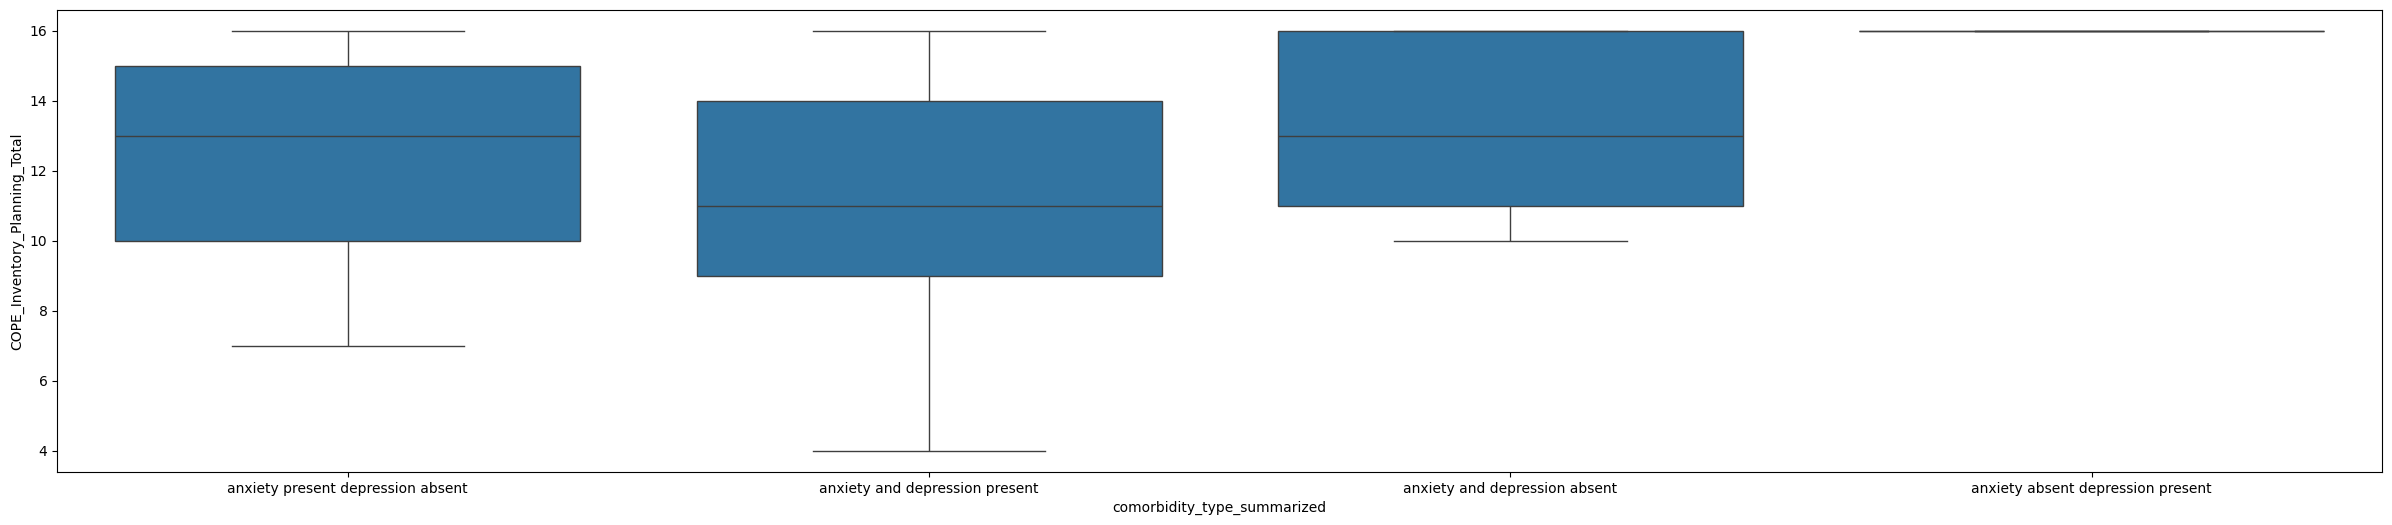

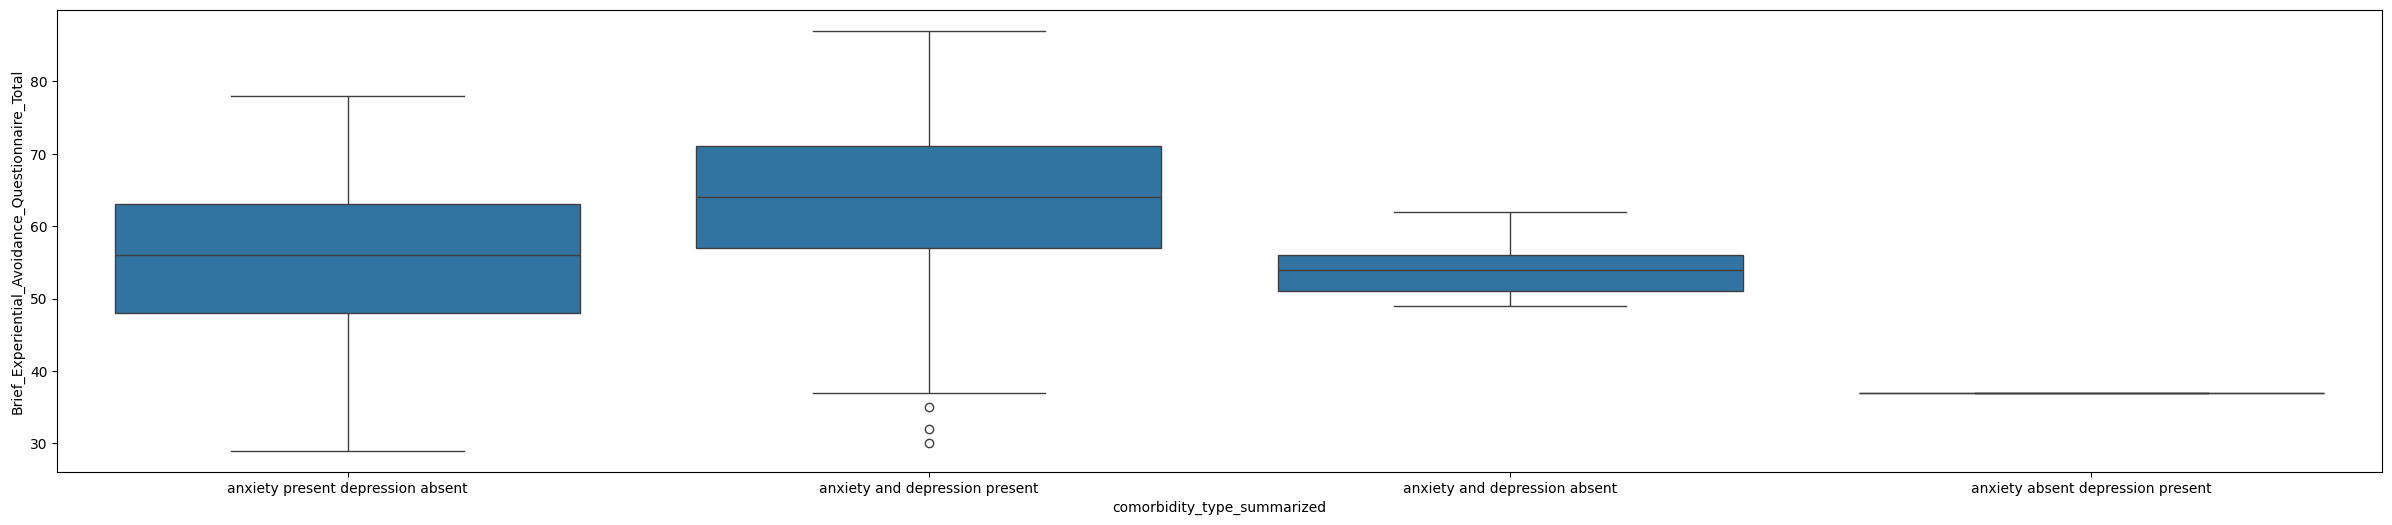

In [122]:
for col in numeric_cols:
    plt.figure(figsize=(30, 6))
    sns.boxplot(data=df, x="comorbidity_type_summarized", y=col)
    plt.show() 

In [123]:
# categories=[anx_and_dep_present,anx_present_dep_absent]
cols_one = ["OCIR_Total", "CATS_Total"]

We are going to focus only on comparing people with both anxiety and depression symptoms and individuals with anxiety symptoms only
because having OCD with zero anxiety symptoms is wired, though this data might be true, our main focus is gonna be around these two groups.
especially that the category of 'no anxiety or depression symptoms'(n=6), and individuals with depression symptoms only(n=1)

In [124]:
df['comorbidity_type_summarized'].value_counts()

comorbidity_type_summarized
anxiety and depression present       72
anxiety present depression absent    41
anxiety and depression absent         5
anxiety absent depression present     1
Name: count, dtype: int64

1. OCIR_Total
the minimum for both categories is 21 as explained above, people with both anxiety and depression symptoms reached to scores up to 66, whereas people with anxiety symptoms only has a maximum of 59 on the OCIR scale

* anxiety present depression absent:
50% scored below or equal 38

* anxiety and depression present:
50% scored below 40.5



2. CATS_Total:
similarly to OCIR, we can also see that people with both anxiety and depression symptoms reached higher scores on the CATS scale (that some scores were never reached by people with anxiety symptoms only)
* anxiety and depression symptom  present:

    With patients reaching scores above 120 (128)
    - 50% scored below or equal 61

* anxiety present, depression absent:
    
    0 patients reaching scores above  95 
    - 50% scored below or equal 40


3. Active Coping strategy measure:
* anxiety and depression symptoms present:
    some patients reached scores as low as 4
    50% scored below or equal 11

* anxiety symptoms present, depression symptoms absent:
    
    never reached scores as low as 4 (minimum is 7)
    50% scored below or equal 13

outliers were not present

In [125]:
df['comorbidity_type_summarized'].value_counts()

comorbidity_type_summarized
anxiety and depression present       72
anxiety present depression absent    41
anxiety and depression absent         5
anxiety absent depression present     1
Name: count, dtype: int64

In [126]:
anx_present_dep_absent["COPE_Inventory_Active_Coping_Total"].min()

np.float64(7.0)

In [127]:
anx_present_dep_absent["Brief_Experiential_Avoidance_Questionnaire_Total"].max()

np.float64(78.0)

In [128]:
anx_and_dep_present["COPE_Inventory_Active_Coping_Total"].min()

np.float64(4.0)

In [129]:
anx_present_dep_absent["COPE_Inventory_Active_Coping_Total"].min()

np.float64(7.0)

In [130]:
anx_present_dep_absent["COPE_Inventory_Planning_Total"].min()

np.float64(7.0)

In [131]:
anx_and_dep_present["CATS_Total"].max()

np.float64(128.0)

In [132]:
anx_present_dep_absent["CATS_Total"].max()

np.float64(95.0)

In [133]:
anx_and_dep_present["Brief_Experiential_Avoidance_Questionnaire_Total"].max()

np.float64(87.0)

4. Planing Coping strategy measure:
* anxiety and depression symptoms present:
    some individuals reached scores as low as 4
    - 50% scored below or equal 11

* anxiety symptoms present, depression symptoms absent:
    
    never reached scores as low as 4 (minimum is 7)
    - 50% scored below or equal 13

outliers were not present


5. Experiential avoidance scale:

*not considering outliers* individuals with anxiety symptoms only did not reach scores that are greater than 78 while some patients with both anxiety and depression symptoms reached up to 87, and people with both anxiety and depression symptoms never scored below around 37 while some of the individuals with anxiety symptoms only scored below that.




OCIR-hoarding

individuals with both anxiety and depression showed difference in this subscale, compared to the other subscale that did not show much difference

* anxiety and depression symptoms present:
    - this category has individuals scoring up to 12 on the OCIR-hoarding subscale (highest score)
* anxiety symptoms present depression symptoms absent:
    - individuals in this category did not reached scores that are greater than 6

which coping style does each category rely on the most?
* anxiety and depression symptoms present:

   the mean of the planning coping scale (11.111) was a little higher than the the active coping scale (10.944)   (very low), which shows almost no difference in the reliance.

* anxiety symptoms present depression symptoms absent:
    the mean of the planning coping scale (12.243) was a little higher than the the active coping scale (11.048)   (very low), which shows almost no difference in the reliance.



In [134]:
anx_and_dep_present['COPE_Inventory_Active_Coping_Total'].mean()

np.float64(10.944444444444445)

In [135]:
anx_and_dep_present['COPE_Inventory_Planning_Total'].mean()

np.float64(11.11111111111111)

In [136]:
anx_present_dep_absent['COPE_Inventory_Active_Coping_Total'].mean()

np.float64(11.048780487804878)

In [137]:
anx_present_dep_absent['COPE_Inventory_Planning_Total'].mean()

np.float64(12.24390243902439)

In [138]:
anx_and_dep_absent['OCIR_Hoarding_Total'].max()

np.float64(6.0)

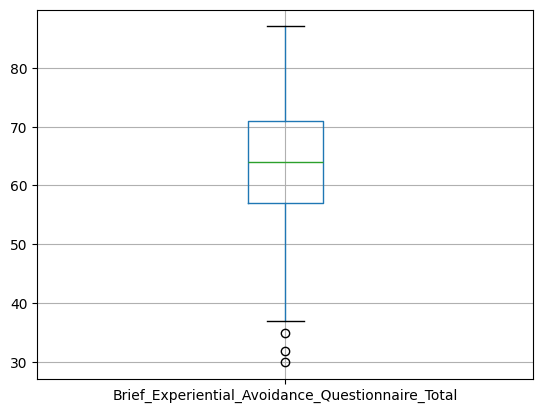

In [139]:
boxplot_data = anx_and_dep_present.boxplot(
    column="Brief_Experiential_Avoidance_Questionnaire_Total", return_type="dict"
)

In [140]:
whiskers = boxplot_data["whiskers"]

In [141]:
whisker_values = [whisker.get_ydata() for whisker in whiskers]

In [142]:
print("Whisker values for 'Brief_Experiential_Avoidance:")
print(whisker_values)

Whisker values for 'Brief_Experiential_Avoidance:
[array([57., 37.]), array([71., 87.])]


In [143]:
anx_present_dep_absent["OCIR_Total"].max()

np.float64(59.0)

In [144]:
anx_and_dep_present["OCIR_Total"].max()

np.float64(66.0)

In [145]:
anx_present_dep_absent["Brief_Experiential_Avoidance_Questionnaire_Total"].min()

np.float64(29.0)

In [146]:
anx_and_dep_present["Brief_Experiential_Avoidance_Questionnaire_Total"].min()

np.float64(30.0)

In [147]:
anx_present_dep_absent["CATS_Total"].max()

np.float64(95.0)

In [148]:
print(
    "EA",
    "25th percentile",
    "anxiety and depression category",
    anx_and_dep_present["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.25
    ),
)
print(
    "EA",
    "50th percentile",
    "anxiety and depression category",
    anx_and_dep_present["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.50
    ),
)
print(
    "EA",
    "75th percentile",
    "anxiety and depression category",
    anx_and_dep_present["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.75
    ),
)

EA 25th percentile anxiety and depression category 57.0
EA 50th percentile anxiety and depression category 64.0
EA 75th percentile anxiety and depression category 71.0


In [149]:
print(
    "EA",
    "25th percentile",
    "anxiety present depression absent category",
    anx_present_dep_absent["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.25
    ),
)
print(
    "EA",
    "50th percentile",
    "anxiety present depression absent category",
    anx_present_dep_absent["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.50
    ),
)
print(
    "EA",
    "75th percentile",
    "anxiety present depression absent category",
    anx_present_dep_absent["Brief_Experiential_Avoidance_Questionnaire_Total"].quantile(
        0.75
    ),
)

EA 25th percentile anxiety present depression absent category 48.0
EA 50th percentile anxiety present depression absent category 56.0
EA 75th percentile anxiety present depression absent category 63.0


In [150]:
for n in cols_one:
    print(
        n,
        "25th percentile",
        "anxiety and depression category",
        anx_and_dep_present[n].quantile(0.25),
    )
    print(
        n,
        "50th percentile",
        "anxiety and depression category",
        anx_and_dep_present[n].quantile(0.50),
    )
    print(
        n,
        "75th percentile",
        "anxiety and depression category",
        anx_and_dep_present[n].quantile(0.75),
    )

OCIR_Total 25th percentile anxiety and depression category 32.75
OCIR_Total 50th percentile anxiety and depression category 40.5
OCIR_Total 75th percentile anxiety and depression category 50.25
CATS_Total 25th percentile anxiety and depression category 37.5
CATS_Total 50th percentile anxiety and depression category 61.0
CATS_Total 75th percentile anxiety and depression category 77.0


In [151]:
for n in cols_one:
    print(
        n,
        "25th percentile",
        "anxiety present depression absent category",
        anx_present_dep_absent[n].quantile(0.25),
    )
    print(
        n,
        "50th percentile",
        "anxiety present depression absent category",
        anx_present_dep_absent[n].quantile(0.50),
    )
    print(
        n,
        "75th percentile",
        "anxiety present depression absent category",
        anx_present_dep_absent[n].quantile(0.75),
    )

OCIR_Total 25th percentile anxiety present depression absent category 28.0
OCIR_Total 50th percentile anxiety present depression absent category 38.0
OCIR_Total 75th percentile anxiety present depression absent category 43.0
CATS_Total 25th percentile anxiety present depression absent category 30.0
CATS_Total 50th percentile anxiety present depression absent category 40.0
CATS_Total 75th percentile anxiety present depression absent category 64.0


In [152]:

print('COPE_Inventory_Active_Coping_Total'
,
        "25th percentile",
        "anxiety and depression category",
        anx_and_dep_present['COPE_Inventory_Active_Coping_Total'].quantile(0.25),
    )
print(
        'COPE_Inventory_Active_Coping_Total',
        "50th percentile",
        "anxiety and depression category",
        anx_and_dep_present['COPE_Inventory_Active_Coping_Total'].quantile(0.50),
    )
print(
        'COPE_Inventory_Active_Coping_Total',
        "75th percentile",
        "anxiety and depression category",
        anx_and_dep_present['COPE_Inventory_Active_Coping_Total'].quantile(0.75),
    )

COPE_Inventory_Active_Coping_Total 25th percentile anxiety and depression category 9.0
COPE_Inventory_Active_Coping_Total 50th percentile anxiety and depression category 11.0
COPE_Inventory_Active_Coping_Total 75th percentile anxiety and depression category 13.0


In [153]:

print('COPE_Inventory_Planning_Total'

,
        "25th percentile",
        "anxiety and depression category",
        anx_and_dep_present['COPE_Inventory_Planning_Total'].quantile(0.25),
    )
print(
        'COPE_Inventory_Planning_Total',
        "50th percentile",
        "anxiety and depression category",
        anx_and_dep_present['COPE_Inventory_Planning_Total'].quantile(0.50),
    )
print(
        'COPE_Inventory_Planning_Total',
        "75th percentile",
        "anxiety and depression category",
        anx_and_dep_present['COPE_Inventory_Planning_Total'].quantile(0.75),
    )

COPE_Inventory_Planning_Total 25th percentile anxiety and depression category 9.0
COPE_Inventory_Planning_Total 50th percentile anxiety and depression category 11.0
COPE_Inventory_Planning_Total 75th percentile anxiety and depression category 14.0


In [154]:

print('COPE_Inventory_Planning_Total'

,
        "25th percentile",
        "anxiety and depression category",
        anx_present_dep_absent['COPE_Inventory_Planning_Total'].quantile(0.25),
    )
print(
        'COPE_Inventory_Planning_Total',
        "50th percentile",
        "anxiety and depression category",
    anx_present_dep_absent['COPE_Inventory_Planning_Total'].quantile(0.50),
    )
print(
        'COPE_Inventory_Planning_Total',
        "75th percentile",
        "anxiety and depression category",
        anx_present_dep_absent['COPE_Inventory_Planning_Total'].quantile(0.75),
    )

COPE_Inventory_Planning_Total 25th percentile anxiety and depression category 10.0
COPE_Inventory_Planning_Total 50th percentile anxiety and depression category 13.0
COPE_Inventory_Planning_Total 75th percentile anxiety and depression category 15.0


In [155]:

print('COPE_Inventory_Active_Coping_Total'

,
        "25th percentile",
        "anxiety and depression category",
        anx_present_dep_absent['COPE_Inventory_Active_Coping_Total'].quantile(0.25),
    )
print(
        'COPE_Inventory_Active_Coping_Total',
        "50th percentile",
        "anxiety and depression category",
        anx_present_dep_absent['COPE_Inventory_Active_Coping_Total'].quantile(0.50),
    )
print(
        'COPE_Inventory_Active_Coping_Total',
        "75th percentile",
        "anxiety and depression category",
        anx_present_dep_absent['COPE_Inventory_Active_Coping_Total'].quantile(0.75),
    )

COPE_Inventory_Active_Coping_Total 25th percentile anxiety and depression category 9.0
COPE_Inventory_Active_Coping_Total 50th percentile anxiety and depression category 11.0
COPE_Inventory_Active_Coping_Total 75th percentile anxiety and depression category 12.0


In [156]:
df["CATS_Total"].corr(df["HADS_DEP_Scale_Total"])

np.float64(0.35473761204132903)